In [0]:
pip install rouge-score  rouge-metric

Python interpreter will be restarted.
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24956 sha256=8c15e3b2c14a35936cd80821e8cd12a858cbea58cbb87522fbc1e6743c327988
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score
Python interpreter will be restarted.


In [0]:
pip install  nltk  boto3  networkx  sklearn  bs4  pandas  s3fs

Python interpreter will be restarted.
  Using cached aiobotocore-2.4.1-py3-none-any.whl (66 kB)
  Using cached aiobotocore-2.4.0-py3-none-any.whl (65 kB)
  Using cached aiobotocore-2.3.4-py3-none-any.whl (64 kB)
  Using cached aiobotocore-2.3.3.tar.gz (65 kB)
  Using cached aiobotocore-2.3.2.tar.gz (104 kB)
  Using cached aiobotocore-2.3.1.tar.gz (65 kB)
  Using cached aiobotocore-2.3.0.tar.gz (65 kB)
  Using cached aiobotocore-2.2.0.tar.gz (59 kB)
  Using cached aiobotocore-2.1.2.tar.gz (58 kB)
  Using cached aiobotocore-2.1.1.tar.gz (57 kB)
  Using cached aiobotocore-2.1.0.tar.gz (54 kB)
  Using cached aiobotocore-2.0.1.tar.gz (54 kB)
  Using cached aiobotocore-2.0.0.tar.gz (52 kB)
  Using cached aiobotocore-1.4.2.tar.gz (52 kB)
  Using cached aiobotocore-1.4.1.tar.gz (52 kB)
  Using cached aiobotocore-1.4.0.tar.gz (51 kB)
  Using cached aiobotocore-1.3.3.tar.gz (50 kB)
  Using cached aiobotocore-1.3.2.tar.gz (49 kB)
  Using cached aiobotocore-1.3.1.tar.gz (48 kB)
  Using cached aiob

In [0]:
pip install boto3 --upgrade


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install rouge --upgrade

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install bs4 requests

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install networkx --upgrade

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade scipy networkx

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install boto3 --upgrade

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import  rouge
import   nltk
from  sklearn.metrics.pairwise  import  cosine_similarity
from   nltk.tokenize.punkt  import   *
from  pyspark.sql.types   import   *
import  s3fs
import  networkx  as  tkx
import   pandas
import  requests
import  matplotlib.pyplot  as  matp
import  boto3
nltk.download('stopwords')
nltk.download('punkt')
from nltk import tokenize
from nltk.corpus import stopwords
import numpy as ny
from rouge_score import rouge_scorer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:

!wget   http://nlp.stanford.edu/data/glove.6B.zip
!unzip   glove*.zip


--2022-11-30 22:34:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-30 22:34:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-30 22:34:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [0]:
def E_word():
    s1 = 'glove.6B.100d.txt'
    _d_type_ = 'float32'
    _en_type_ = 'utf-8'    
    pointer_f = open (s1, encoding =_en_type_)
    callpointer(pointer_f,_d_type_)


def callpointer(pointer_f,v1):
    for row in pointer_f:
        _res_ = row.split()
        i = _res_[0]
        j = ny.asarray (_res_ [1:], dtype = v1)
        word_embed_[i] = j  
    pointer_f.close()
    

def sntnce_ranking(s1,s2):
    grph_sen = tkx.from_numpy_array(s2)
    score_sen= tkx.pagerank(grph_sen)
    order_sen = sorted(((score_sen[jk],jk) for jk, s in enumerate(s1)), reverse=True)
    return order_sen

def cal_Sim_MAT(s1, s2, s3):
    len_sntncs = len(s2)
    sim_MAT = ny.zeros([len_sntncs,len_sntncs])
    cos_Mat=cos_sim_mat(len_sntncs,sim_MAT,s1,s3) 
    return cos_Mat
    
def cos_sim_mat(s4,s2,s1,s3):
    for k1 in range(0,s4):
        for k2 in range(0,s4):
            if k1 != k2:
                s2[k1][k2] = cosine_similarity(s1[k1].reshape(1,s3), s1[k2].reshape(1,s3))[0,0]
                
    return s2

def grhplt (s1, s2, s3, s4):
    fnam = s2+".jpg"
    clr = '#1f57b4'
    if s2 == l3[0]:
        clr = '#bbbd22'
    elif s2 == l3[1]:
        clr = '#7f6f7f'
      
    matp.figure(figsize=(7,7))
    for v1 in s1:
         matp.plot(s3, v1, clr, label = s2)
    matp.xlabel("No. of Sentences")
    matp.ylabel(s2)
    matp.legend([s4])
    matp.show()
    matp.savefig(fnam)

def get_abstract(ordered_sen, no_sen):
    l = []
    sen_abstract = min(no_sen, len(ordered_sen))
    for s in range(sen_abstract):
        l.append ( ordered_sen[s][1])
    return l

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.014705882352941176 0.05263157894736842 0.022988505747126436
2 0.04411764705882353 0.08333333333333333 0.057692307692307696
3 0.058823529411764705 0.08333333333333333 0.06896551724137931
4 0.058823529411764705 0.05555555555555555 0.05714285714285714
5 0.058823529411764705 0.0425531914893617 0.04938271604938272
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.04411764705882353 0.15789473684210525 0.06896551724137931
2 0.08823529411764706 0.16666666666666666 0.11538461538461539
3 0.08823529411764706 0.125 0.10344827586206896
4 0.08823529411764706 0.08333333333333333 0.08571428571428572
5 0.11764705882352941 0.0851063829787234 0.09876543209876544
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0 0

<Figure size 432x288 with 0 Axes>

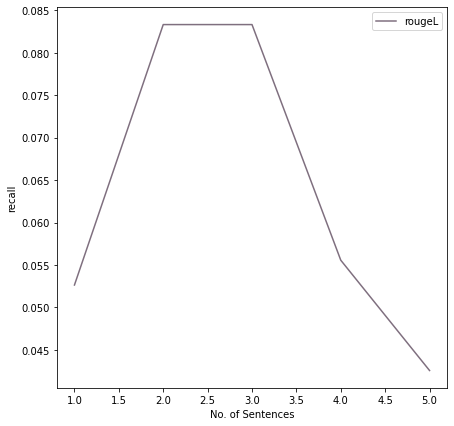

<Figure size 432x288 with 0 Axes>

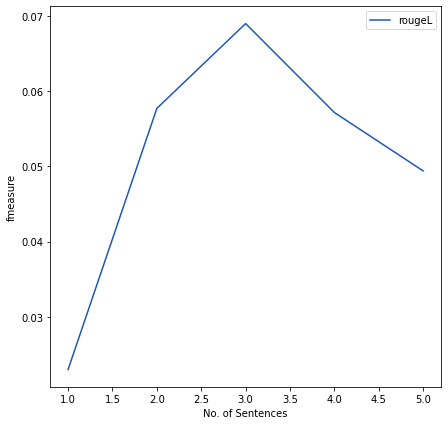

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

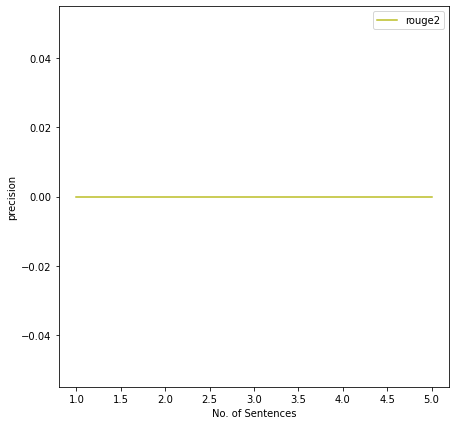

<Figure size 432x288 with 0 Axes>

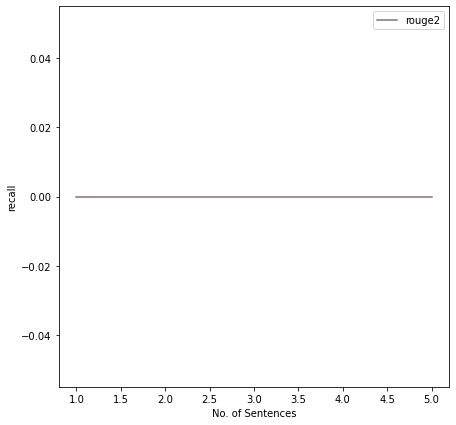

<Figure size 432x288 with 0 Axes>

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0136986301369863 0.05555555555555555 0.02197802197802198
2 0.0136986301369863 0.03333333333333333 0.019417475728155338
3 0.0273972602739726 0.045454545454545456 0.034188034188034185
4 0.0547945205479452 0.06451612903225806 0.059259259259259255
5 0.0547945205479452 0.056338028169014086 0.05555555555555555
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0136986301369863 0.05555555555555555 0.02197802197802198
2 0.0136986301369863 0.03333333333333333 0.019417475728155338
3 0.0410958904109589 0.06818181818181818 0.05128205128205127
4 0.0684931506849315 0.08064516129032258 0.07407407407407407
5 0.0684931506849315 0.07042253521126761 0.06944444444444443
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.01388888888

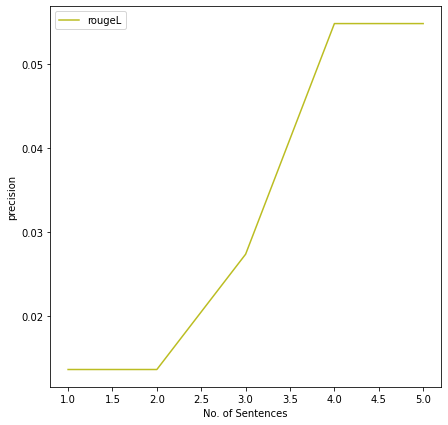

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

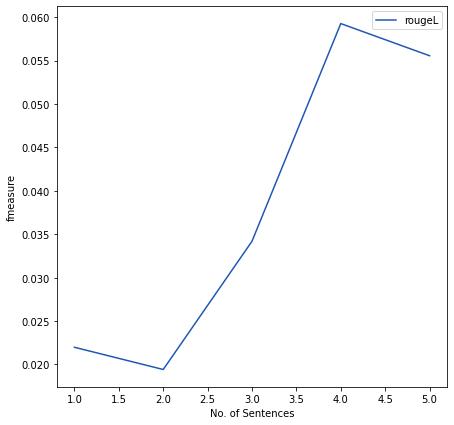

<Figure size 432x288 with 0 Axes>

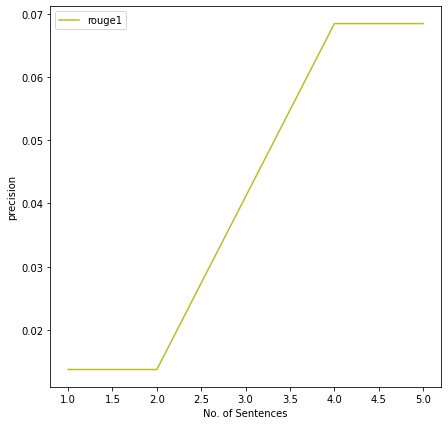

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

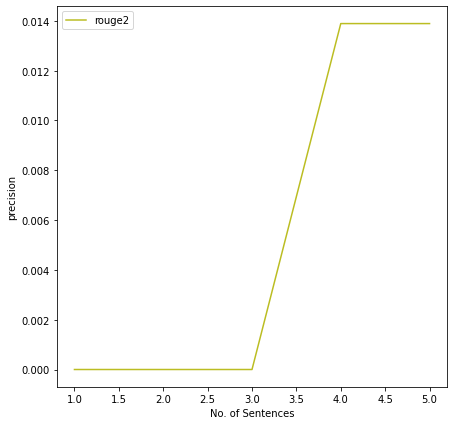

<Figure size 432x288 with 0 Axes>

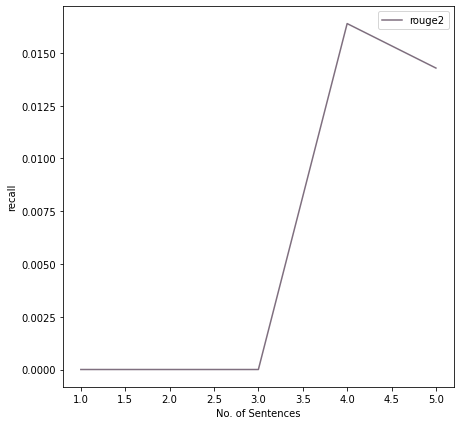

<Figure size 432x288 with 0 Axes>

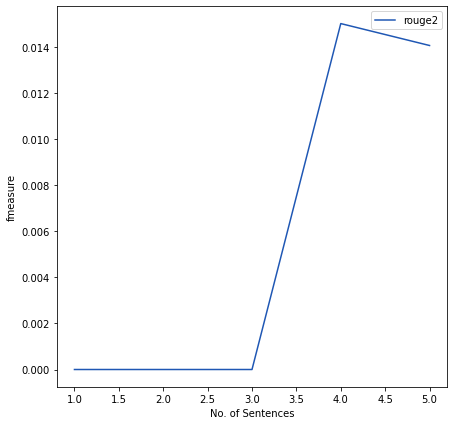

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0851063829787234 0.25806451612903225 0.128
2 0.07446808510638298 0.14893617021276595 0.09929078014184396
3 0.07446808510638298 0.11864406779661017 0.0915032679738562
4 0.07446808510638298 0.07291666666666667 0.07368421052631578
5 0.07446808510638298 0.0625 0.06796116504854369
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.1276595744680851 0.3870967741935484 0.192
2 0.11702127659574468 0.23404255319148937 0.15602836879432624
3 0.11702127659574468 0.1864406779661017 0.14379084967320263
4 0.18085106382978725 0.17708333333333334 0.17894736842105263
5 0.18085106382978725 0.15178571428571427 0.1650485436893204
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.010752688172043012 0.03333333333333333 0.016260162601626018
2 0.010752688172043012 0.02173913043

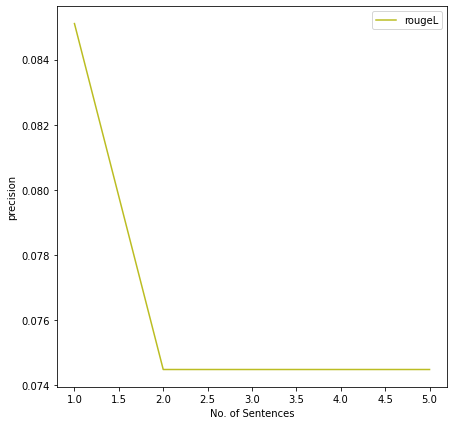

<Figure size 432x288 with 0 Axes>

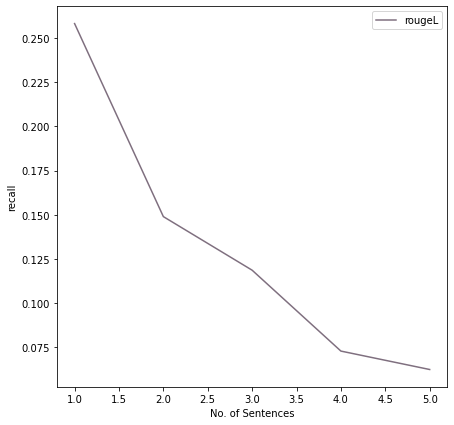

<Figure size 432x288 with 0 Axes>

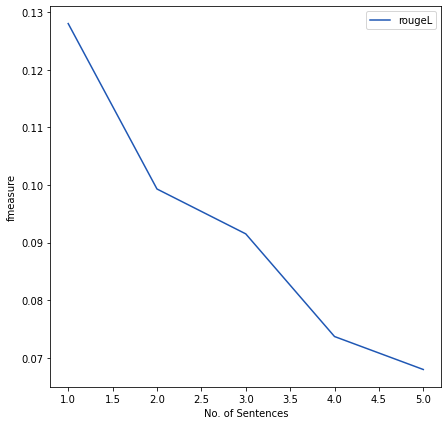

<Figure size 432x288 with 0 Axes>

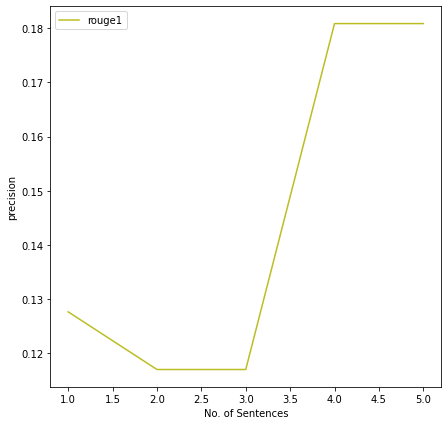

<Figure size 432x288 with 0 Axes>

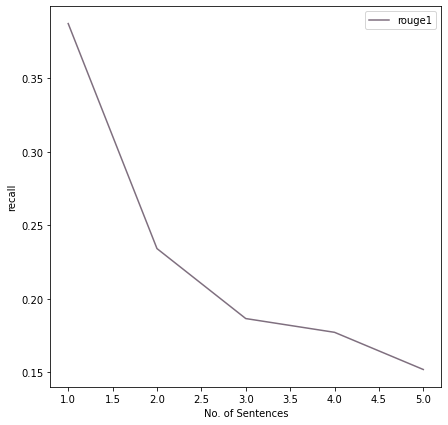

<Figure size 432x288 with 0 Axes>

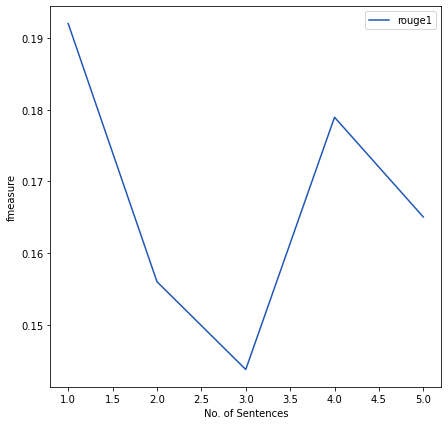

<Figure size 432x288 with 0 Axes>

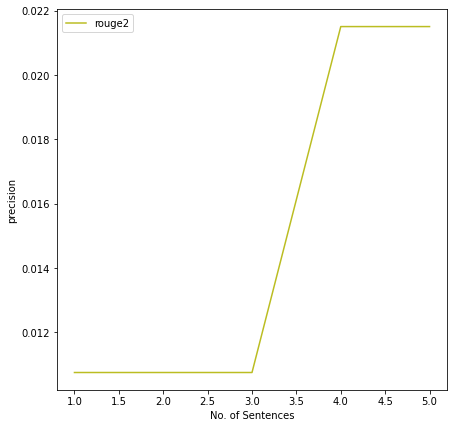

<Figure size 432x288 with 0 Axes>

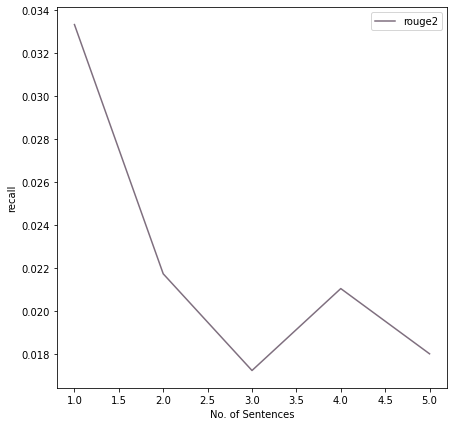

<Figure size 432x288 with 0 Axes>

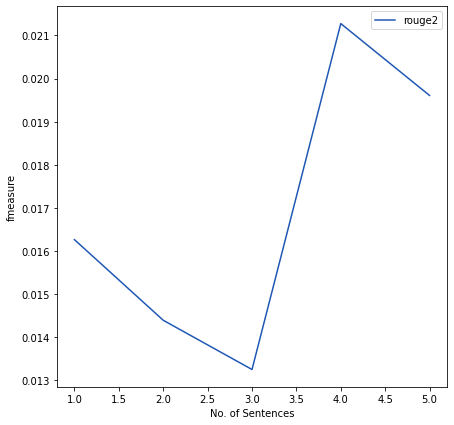

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.017857142857142856 0.1 0.030303030303030304
2 0.02976190476190476 0.10416666666666667 0.046296296296296294
3 0.03571428571428571 0.0821917808219178 0.04979253112033195
4 0.047619047619047616 0.09411764705882353 0.06324110671936758
5 0.06547619047619048 0.10091743119266056 0.07942238267148015
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.041666666666666664 0.23333333333333334 0.0707070707070707
2 0.07142857142857142 0.25 0.11111111111111112
3 0.10119047619047619 0.2328767123287671 0.14107883817427386
4 0.13095238095238096 0.25882352941176473 0.17391304347826086
5 0.14285714285714285 0.22018348623853212 0.17328519855595667
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.005988023952095809 0.034482758620689655 0.010204081632653062
2 0.0059880239520

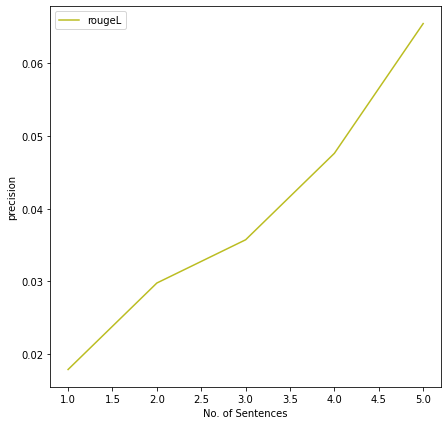

<Figure size 432x288 with 0 Axes>

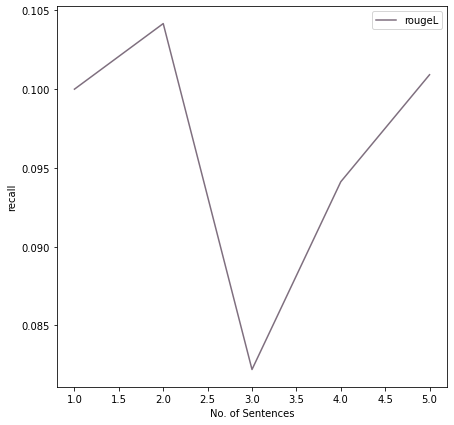

<Figure size 432x288 with 0 Axes>

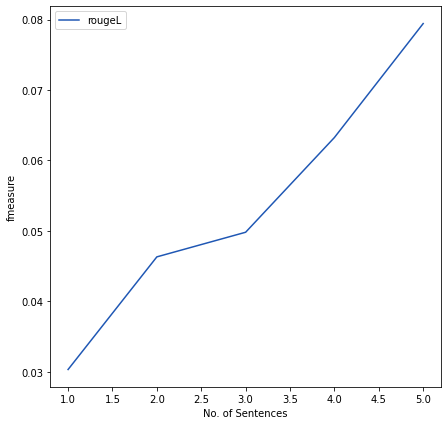

<Figure size 432x288 with 0 Axes>

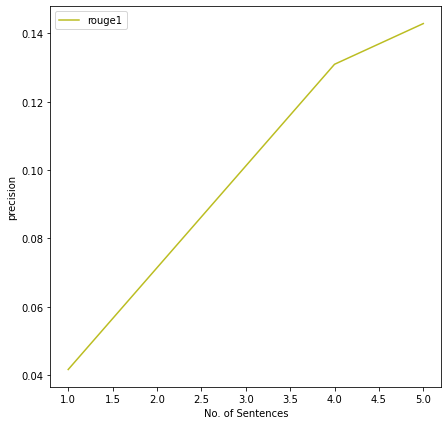

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

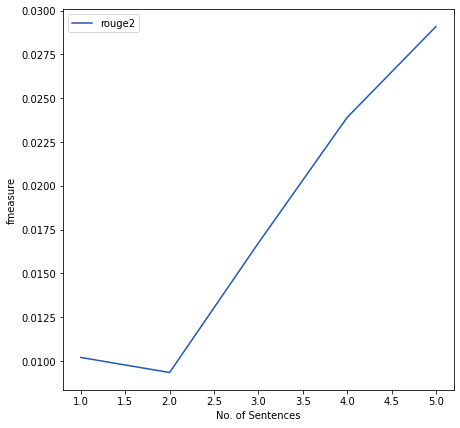

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.02564102564102564 0.09523809523809523 0.0404040404040404
2 0.02564102564102564 0.06451612903225806 0.03669724770642202
3 0.038461538461538464 0.07317073170731707 0.05042016806722689
4 0.038461538461538464 0.04918032786885246 0.04316546762589928
5 0.07692307692307693 0.06896551724137931 0.07272727272727274
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.05128205128205128 0.19047619047619047 0.0808080808080808
2 0.05128205128205128 0.12903225806451613 0.07339449541284404
3 0.0641025641025641 0.12195121951219512 0.08403361344537814
4 0.07692307692307693 0.09836065573770492 0.08633093525179857
5 0.11538461538461539 0.10344827586206896 0.10909090909090909
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.

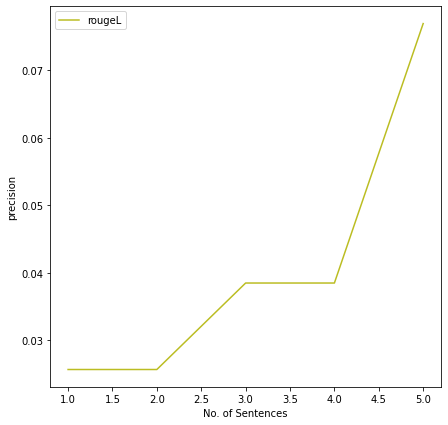

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

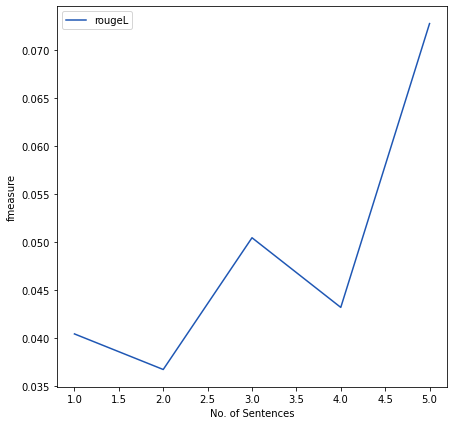

<Figure size 432x288 with 0 Axes>

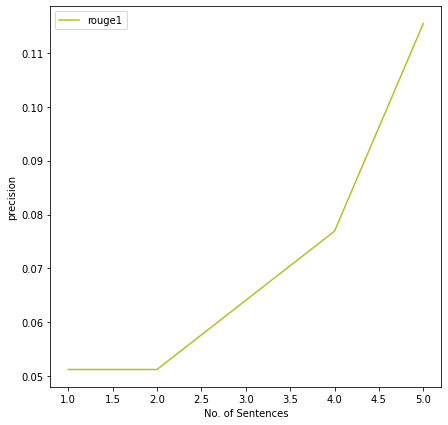

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

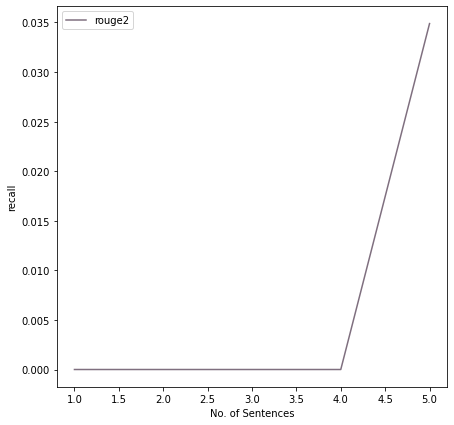

<Figure size 432x288 with 0 Axes>

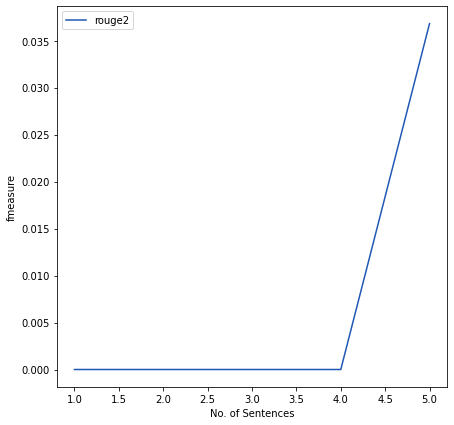

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0625 0.19230769230769232 0.09433962264150944
2 0.0625 0.125 0.08333333333333333
3 0.0625 0.08928571428571429 0.07352941176470587
4 0.0625 0.06172839506172839 0.062111801242236024
5 0.0625 0.05154639175257732 0.05649717514124294
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0625 0.19230769230769232 0.09433962264150944
2 0.0625 0.125 0.08333333333333333
3 0.0875 0.125 0.10294117647058823
4 0.1 0.09876543209876543 0.09937888198757763
5 0.125 0.10309278350515463 0.11299435028248588
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.012658227848101266 0.01818181818181818 0.01492537313432836
4 0.012658227848101266 0.0125 0.012578616352201257
5 0.012658227848101266 0.010416666666666666 0.011428571428571429
<Figure size 432x288 

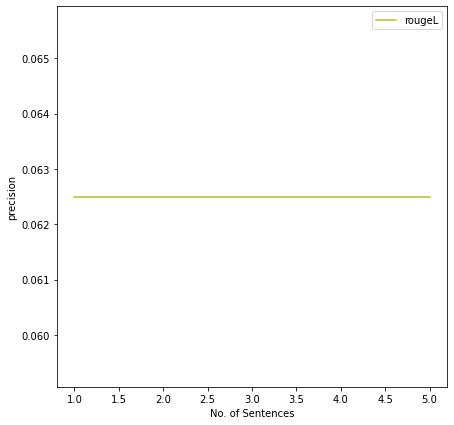

<Figure size 432x288 with 0 Axes>

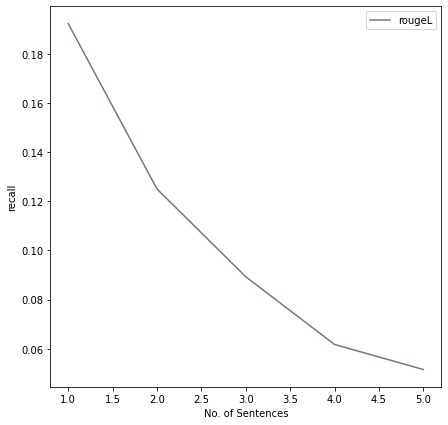

<Figure size 432x288 with 0 Axes>

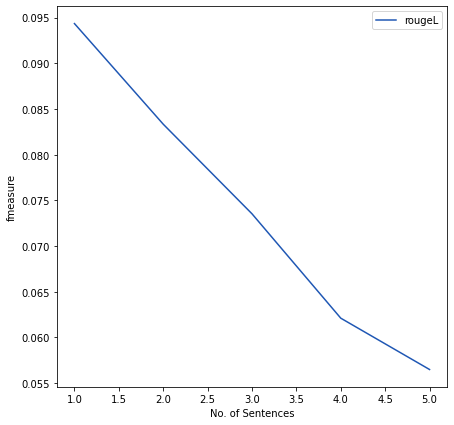

<Figure size 432x288 with 0 Axes>

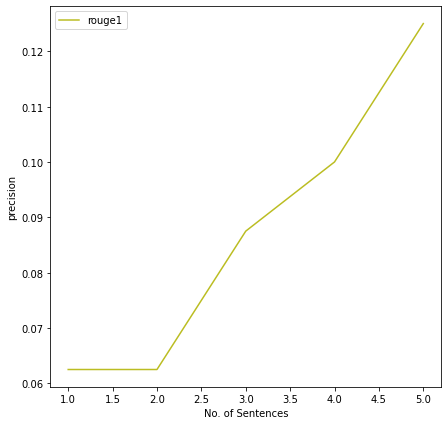

<Figure size 432x288 with 0 Axes>

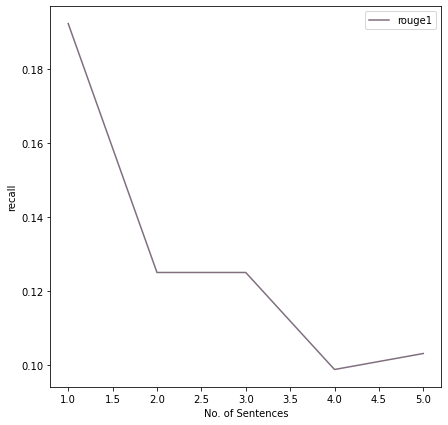

<Figure size 432x288 with 0 Axes>

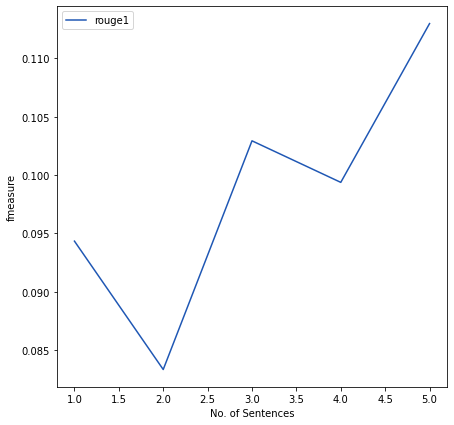

<Figure size 432x288 with 0 Axes>

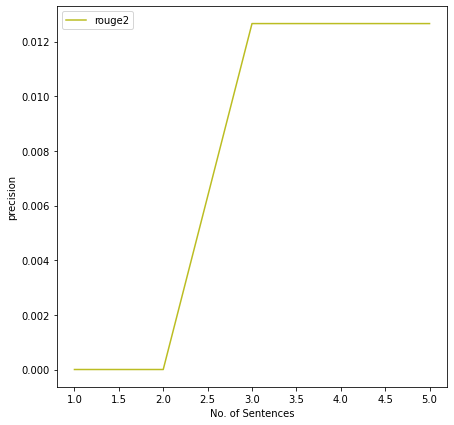

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

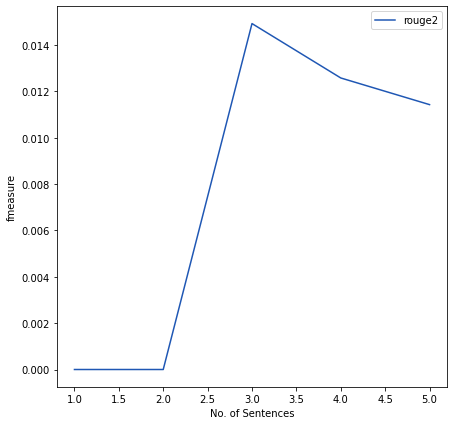

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.09 0.2903225806451613 0.13740458015267173
2 0.1 0.18518518518518517 0.12987012987012986
3 0.13 0.16049382716049382 0.143646408839779
4 0.14 0.14285714285714285 0.1414141414141414
5 0.14 0.11965811965811966 0.12903225806451613
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.11 0.3548387096774194 0.16793893129770993
2 0.12 0.2222222222222222 0.15584415584415584
3 0.15 0.18518518518518517 0.16574585635359118
4 0.17 0.17346938775510204 0.17171717171717174
5 0.17 0.1452991452991453 0.1566820276497696
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.04040404040404041 0.13333333333333333 0.06201550387596899
2 0.04040404040404041 0.07547169811320754 0.052631578947368425
3 0.06060606060606061 0.075 0.06703910614525138
4 0.06060606060606061 0.061855670103092

<Figure size 432x288 with 0 Axes>

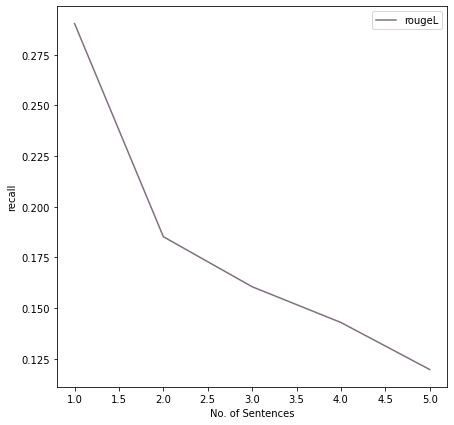

<Figure size 432x288 with 0 Axes>

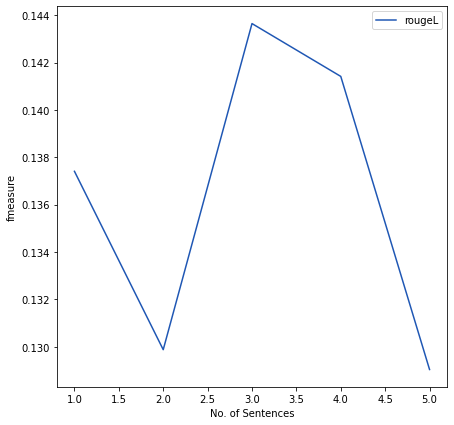

<Figure size 432x288 with 0 Axes>

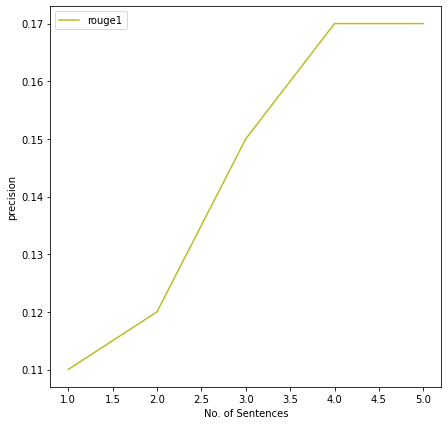

<Figure size 432x288 with 0 Axes>

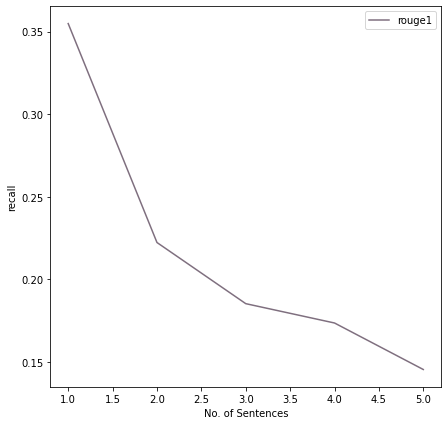

<Figure size 432x288 with 0 Axes>

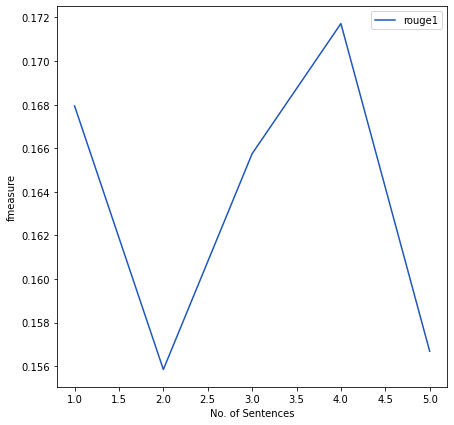

<Figure size 432x288 with 0 Axes>

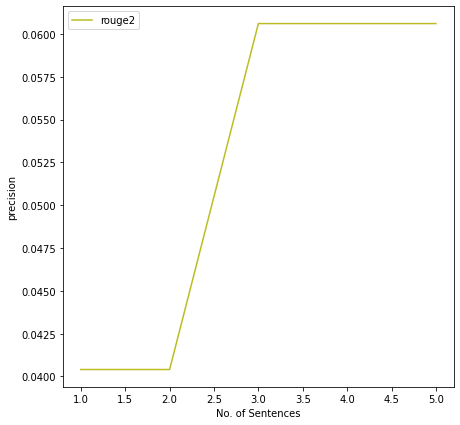

<Figure size 432x288 with 0 Axes>

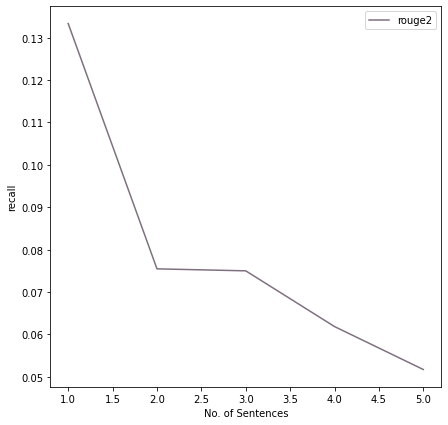

<Figure size 432x288 with 0 Axes>

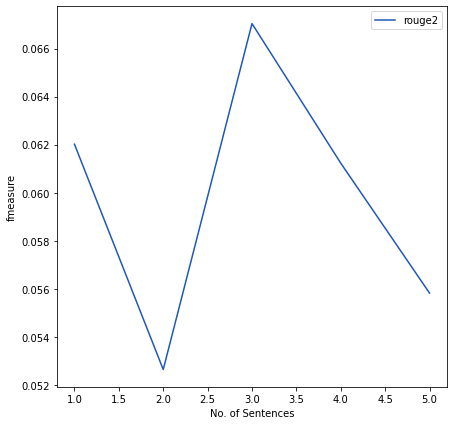

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.013157894736842105 0.06666666666666667 0.021978021978021976
2 0.10526315789473684 0.19047619047619047 0.13559322033898305
3 0.14473684210526316 0.1896551724137931 0.16417910447761194
4 0.14473684210526316 0.13414634146341464 0.13924050632911392
5 0.14473684210526316 0.11956521739130435 0.13095238095238096
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.02631578947368421 0.13333333333333333 0.04395604395604395
2 0.17105263157894737 0.30952380952380953 0.22033898305084748
3 0.17105263157894737 0.22413793103448276 0.19402985074626866
4 0.17105263157894737 0.15853658536585366 0.16455696202531647
5 0.17105263157894737 0.14130434782608695 0.15476190476190477
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.05333333333333334 0.09756097560975

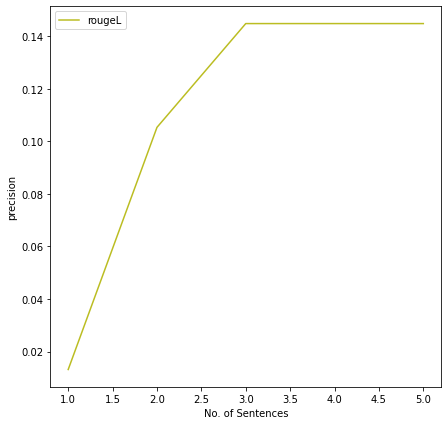

<Figure size 432x288 with 0 Axes>

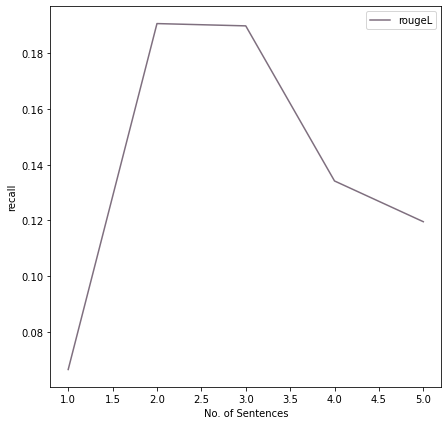

<Figure size 432x288 with 0 Axes>

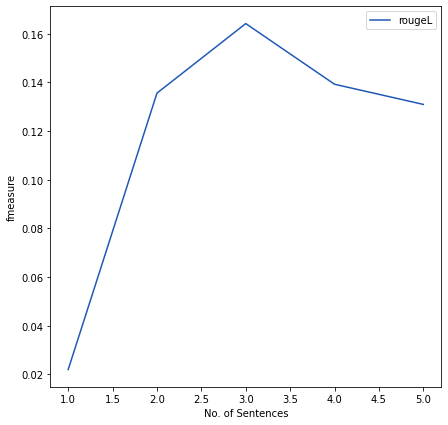

<Figure size 432x288 with 0 Axes>

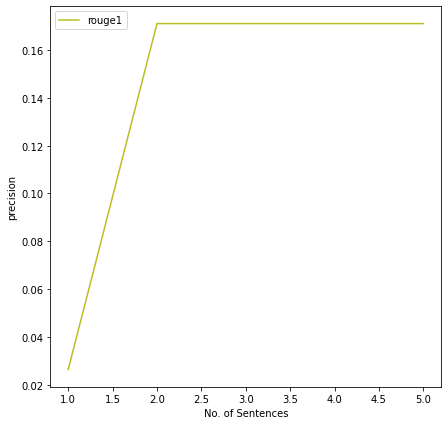

<Figure size 432x288 with 0 Axes>

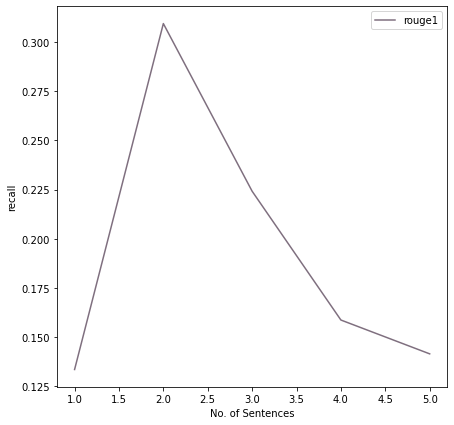

<Figure size 432x288 with 0 Axes>

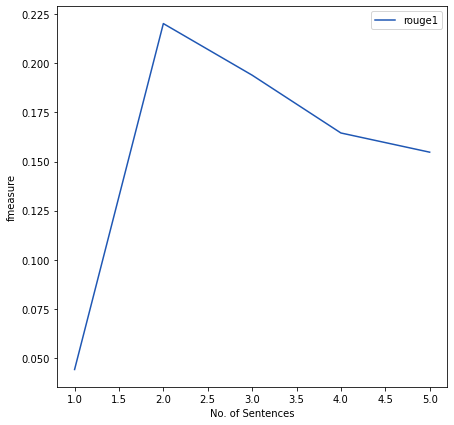

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

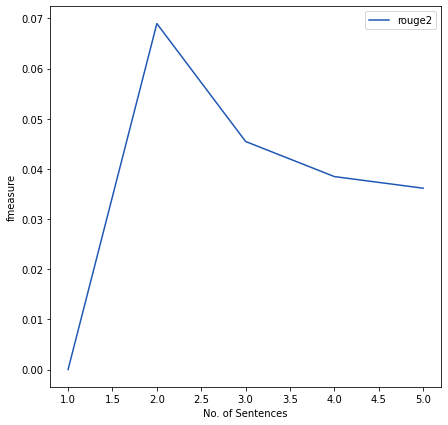

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0425531914893617 0.19047619047619047 0.06956521739130433
2 0.05319148936170213 0.125 0.0746268656716418
3 0.06382978723404255 0.09523809523809523 0.07643312101910828
4 0.07446808510638298 0.0875 0.08045977011494253
5 0.0851063829787234 0.07920792079207921 0.08205128205128205
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.05319148936170213 0.23809523809523808 0.08695652173913043
2 0.09574468085106383 0.225 0.13432835820895522
3 0.10638297872340426 0.15873015873015872 0.12738853503184713
4 0.13829787234042554 0.1625 0.14942528735632185
5 0.1595744680851064 0.1485148514851485 0.15384615384615388
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.010752688172043012 0.05 0.017699115044247787
2 0.010752688172043012 0.02564102564102564 0.015151515151515154

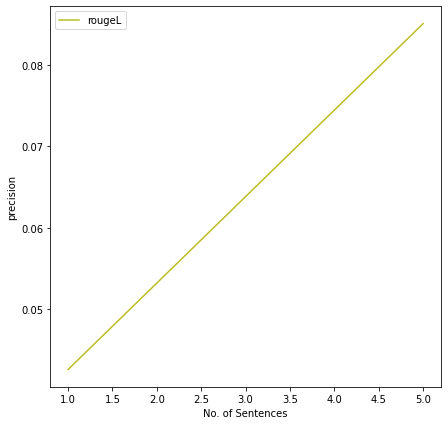

<Figure size 432x288 with 0 Axes>

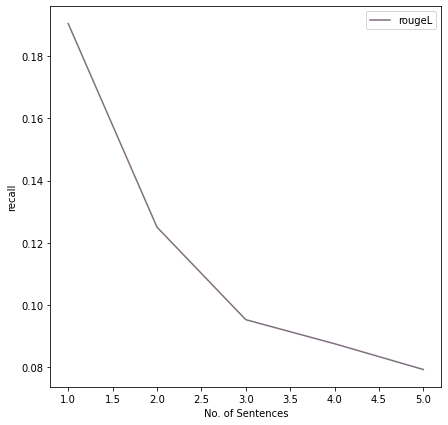

<Figure size 432x288 with 0 Axes>

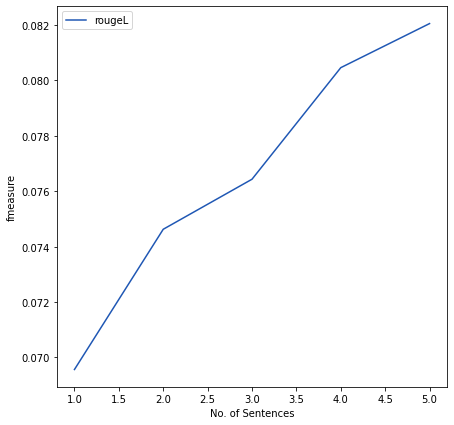

<Figure size 432x288 with 0 Axes>

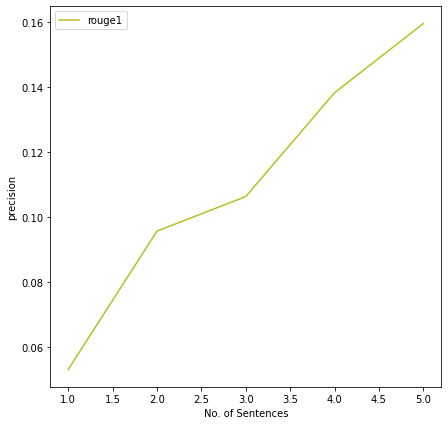

<Figure size 432x288 with 0 Axes>

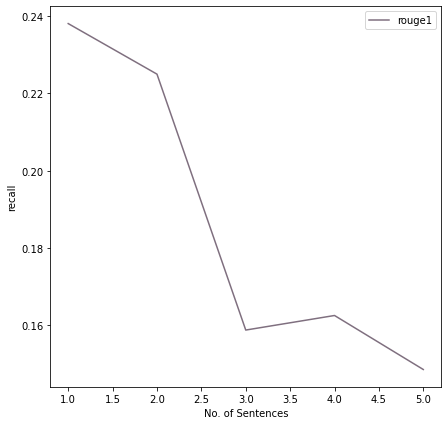

<Figure size 432x288 with 0 Axes>

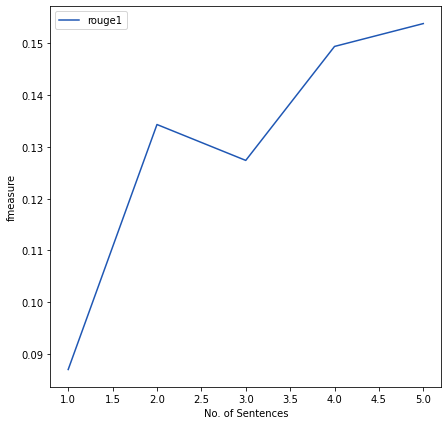

<Figure size 432x288 with 0 Axes>

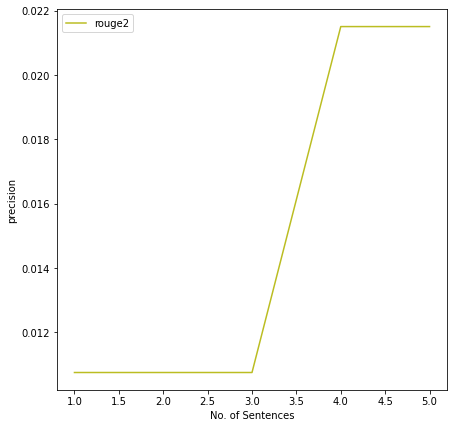

<Figure size 432x288 with 0 Axes>

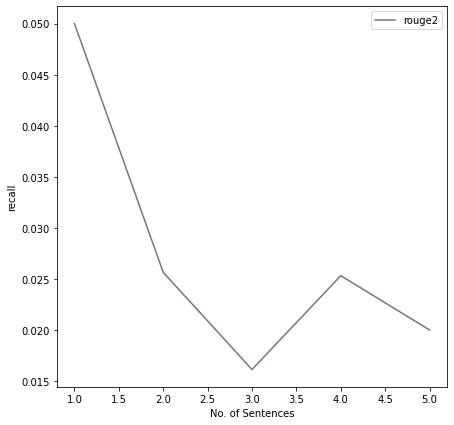

<Figure size 432x288 with 0 Axes>

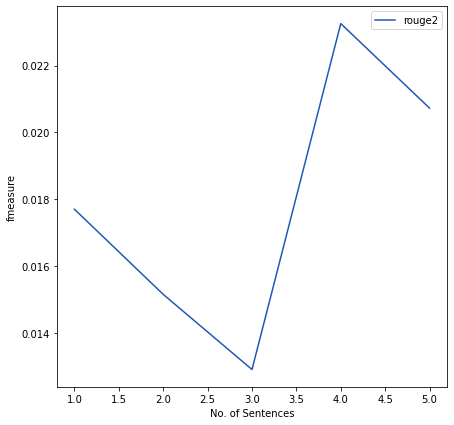

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.013513513513513514 0.13333333333333333 0.024539877300613498
2 0.02027027027027027 0.10714285714285714 0.034090909090909095
3 0.02702702702702703 0.11764705882352941 0.04395604395604396
4 0.02702702702702703 0.08888888888888889 0.04145077720207254
5 0.02702702702702703 0.06451612903225806 0.0380952380952381
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.02027027027027027 0.2 0.03680981595092024
2 0.02702702702702703 0.14285714285714285 0.045454545454545456
3 0.033783783783783786 0.14705882352941177 0.05494505494505494
4 0.04054054054054054 0.13333333333333333 0.062176165803108814
5 0.0472972972972973 0.11290322580645161 0.06666666666666667
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0 0.0

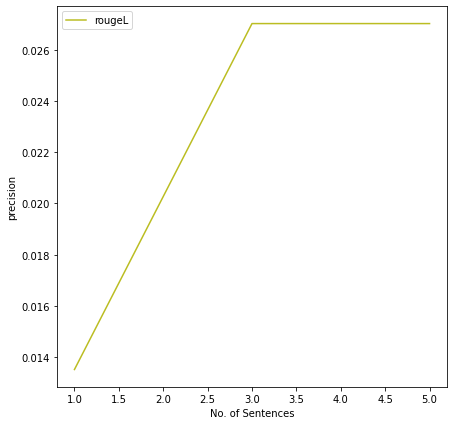

<Figure size 432x288 with 0 Axes>

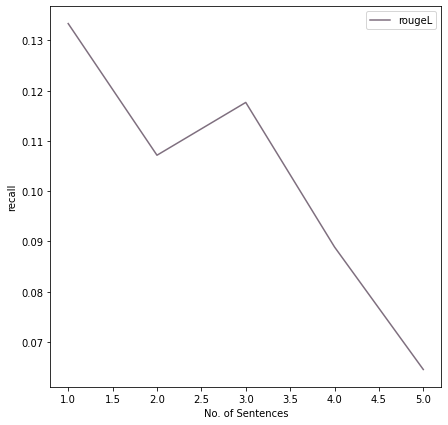

<Figure size 432x288 with 0 Axes>

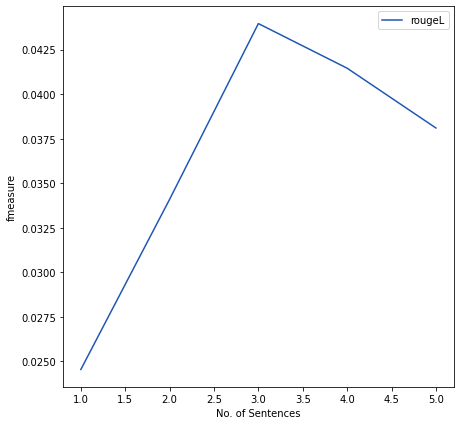

<Figure size 432x288 with 0 Axes>

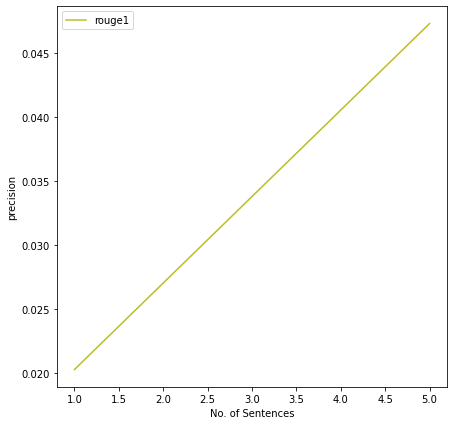

<Figure size 432x288 with 0 Axes>

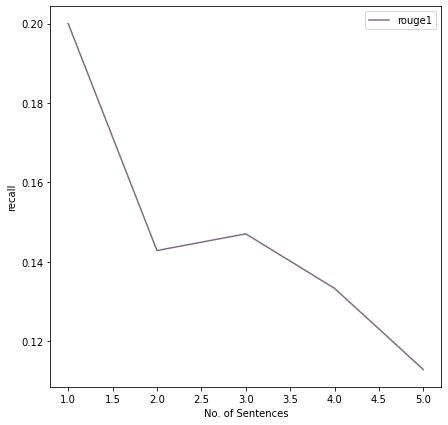

<Figure size 432x288 with 0 Axes>

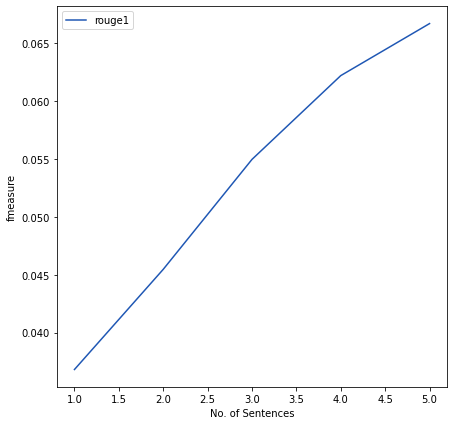

<Figure size 432x288 with 0 Axes>

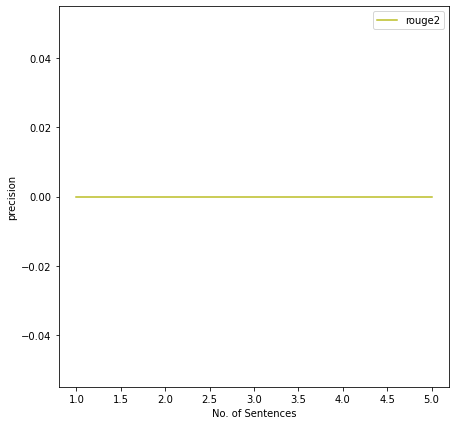

<Figure size 432x288 with 0 Axes>

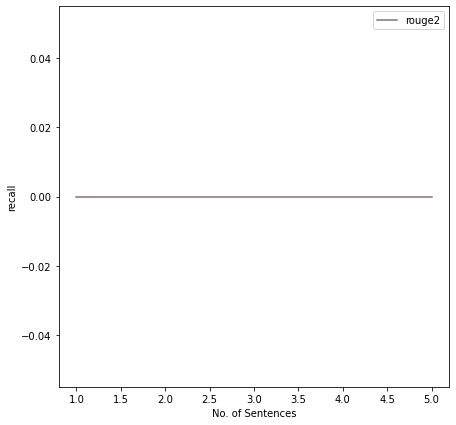

<Figure size 432x288 with 0 Axes>

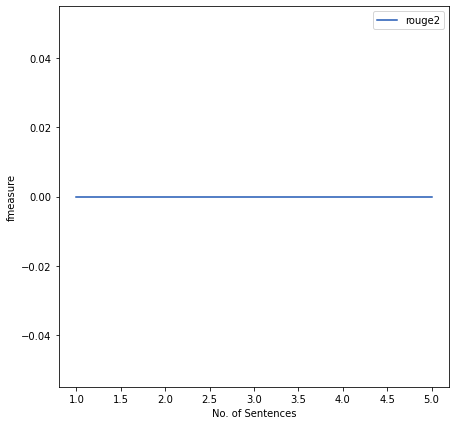

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.006578947368421052 0.1 0.012345679012345678
2 0.039473684210526314 0.17647058823529413 0.06451612903225806
3 0.046052631578947366 0.14285714285714285 0.06965174129353234
4 0.05263157894736842 0.11940298507462686 0.0730593607305936
5 0.06578947368421052 0.11494252873563218 0.08368200836820083
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.006578947368421052 0.1 0.012345679012345678
2 0.05921052631578947 0.2647058823529412 0.0967741935483871
3 0.07894736842105263 0.24489795918367346 0.11940298507462688
4 0.10526315789473684 0.23880597014925373 0.1461187214611872
5 0.1118421052631579 0.19540229885057472 0.14225941422594143
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.013245033112582781 0.06060606060606061 0.021739130434782608
3 0.01

<Figure size 432x288 with 0 Axes>

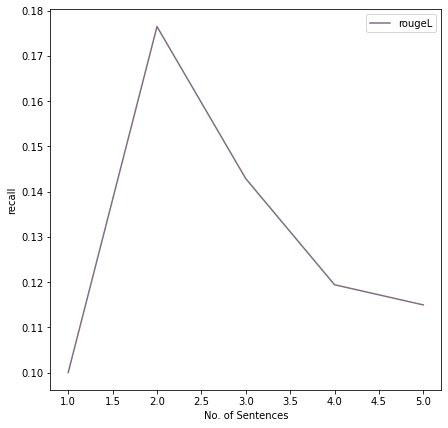

<Figure size 432x288 with 0 Axes>

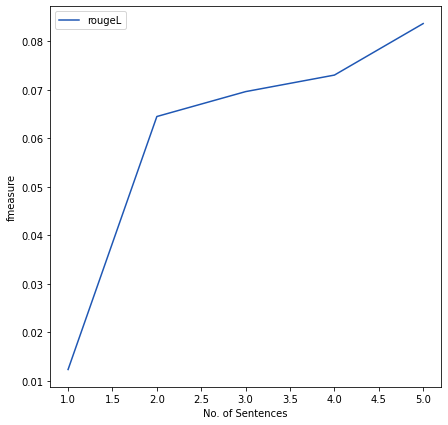

<Figure size 432x288 with 0 Axes>

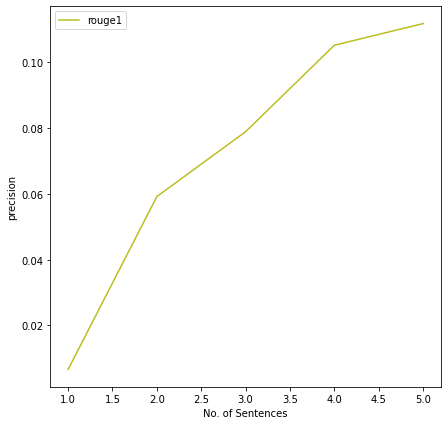

<Figure size 432x288 with 0 Axes>

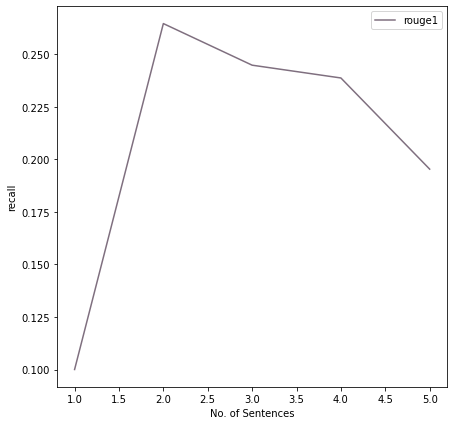

<Figure size 432x288 with 0 Axes>

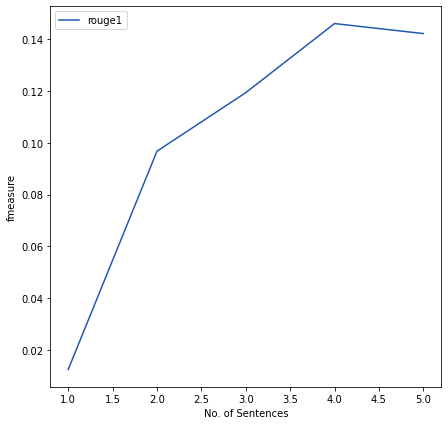

<Figure size 432x288 with 0 Axes>

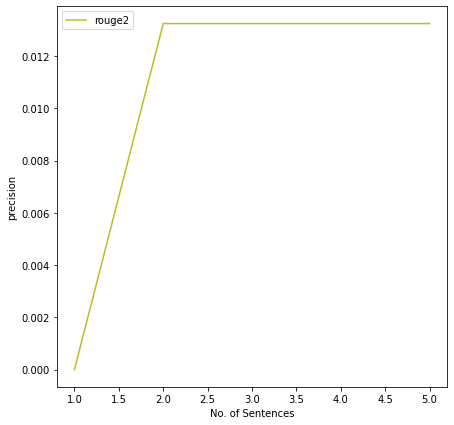

<Figure size 432x288 with 0 Axes>

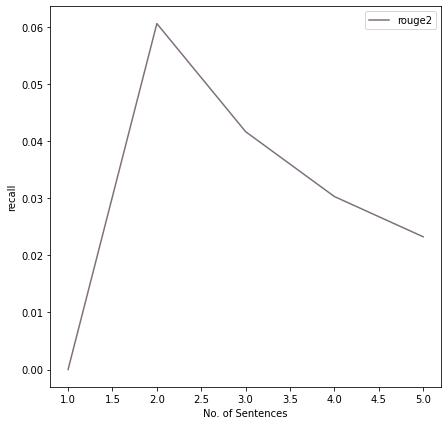

<Figure size 432x288 with 0 Axes>

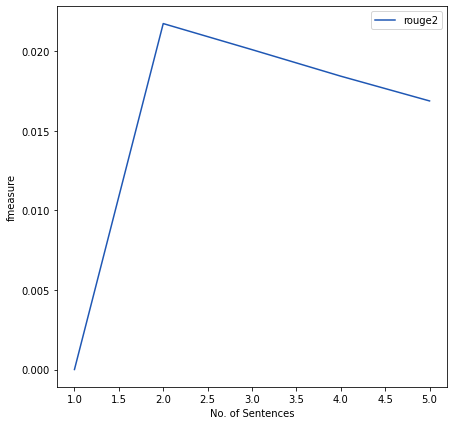

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.07317073170731707 0.2222222222222222 0.11009174311926605
2 0.07317073170731707 0.14634146341463414 0.09756097560975609
3 0.08536585365853659 0.1346153846153846 0.10447761194029852
4 0.08536585365853659 0.11864406779661017 0.09929078014184398
5 0.08536585365853659 0.0945945945945946 0.08974358974358976
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.12195121951219512 0.37037037037037035 0.18348623853211007
2 0.14634146341463414 0.2926829268292683 0.19512195121951217
3 0.2073170731707317 0.3269230769230769 0.25373134328358204
4 0.21951219512195122 0.3050847457627119 0.2553191489361702
5 0.24390243902439024 0.2702702702702703 0.2564102564102564
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.04938271604938271 0.15384615384615385 0.07476635514018692
2

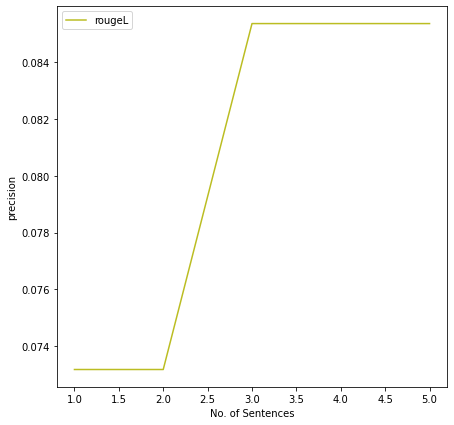

<Figure size 432x288 with 0 Axes>

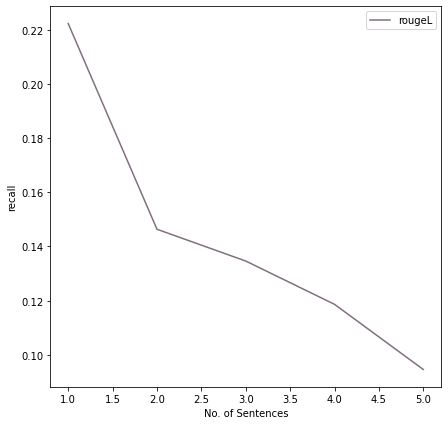

<Figure size 432x288 with 0 Axes>

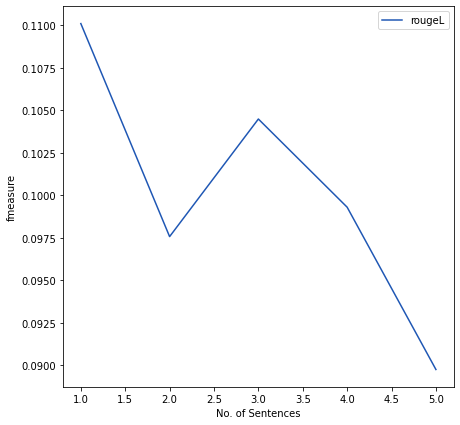

<Figure size 432x288 with 0 Axes>

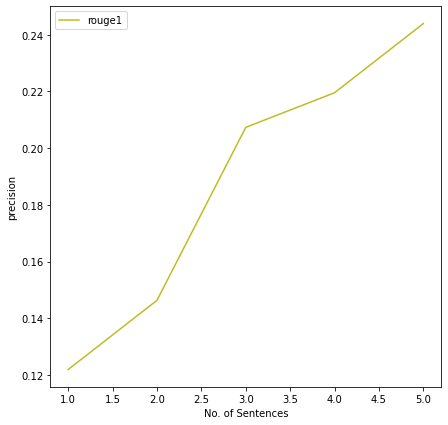

<Figure size 432x288 with 0 Axes>

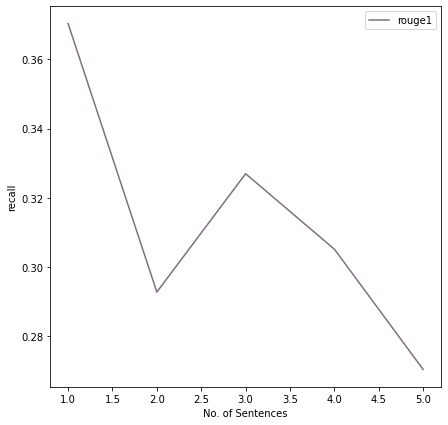

<Figure size 432x288 with 0 Axes>

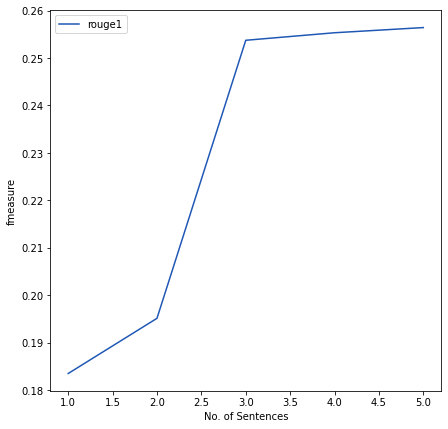

<Figure size 432x288 with 0 Axes>

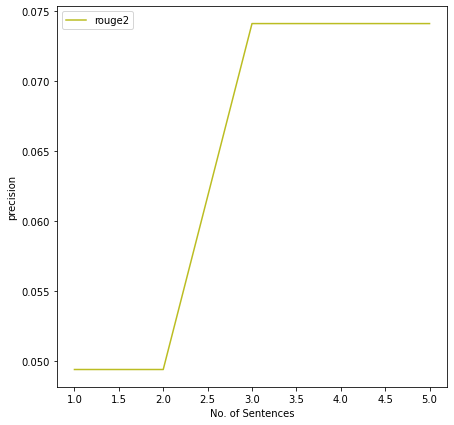

<Figure size 432x288 with 0 Axes>

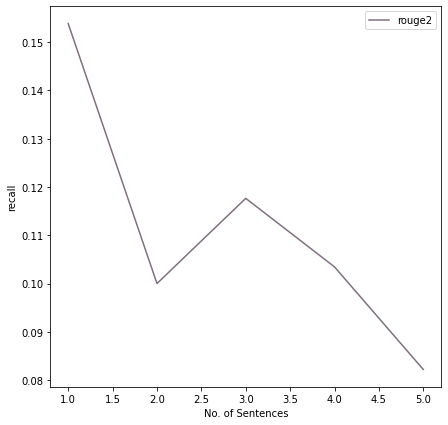

<Figure size 432x288 with 0 Axes>

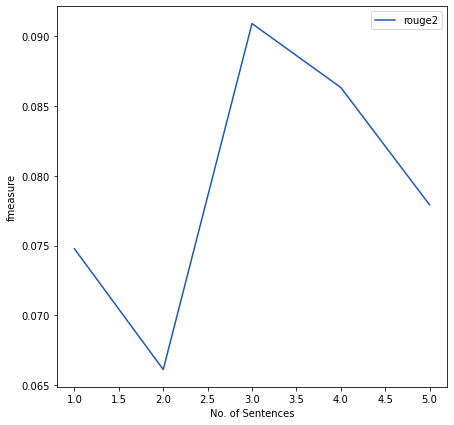

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.05454545454545454 0.15384615384615385 0.08053691275167785
2 0.06363636363636363 0.0875 0.07368421052631578
3 0.06363636363636363 0.07 0.06666666666666667
4 0.07272727272727272 0.07079646017699115 0.07174887892376682
5 0.07272727272727272 0.06299212598425197 0.06751054852320675
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.1 0.28205128205128205 0.1476510067114094
2 0.13636363636363635 0.1875 0.15789473684210525
3 0.15454545454545454 0.17 0.16190476190476188
4 0.15454545454545454 0.1504424778761062 0.1524663677130045
5 0.16363636363636364 0.14173228346456693 0.15189873417721517
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.027522935779816515 0.07894736842105263 0.04081632653061224
2 0.03669724770642202 0.05063291139240506 0.04255319148936171
3 0

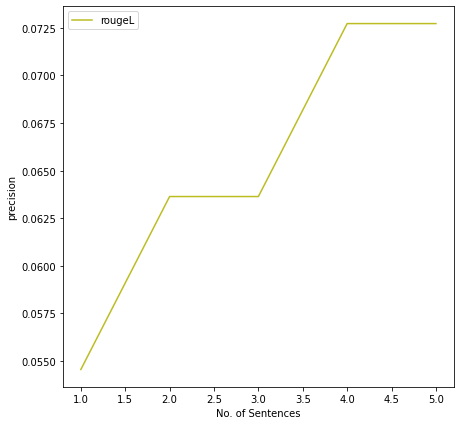

<Figure size 432x288 with 0 Axes>

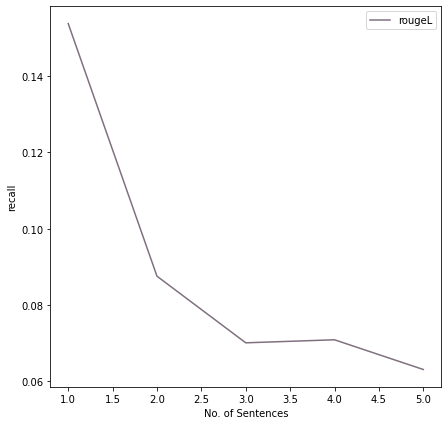

<Figure size 432x288 with 0 Axes>

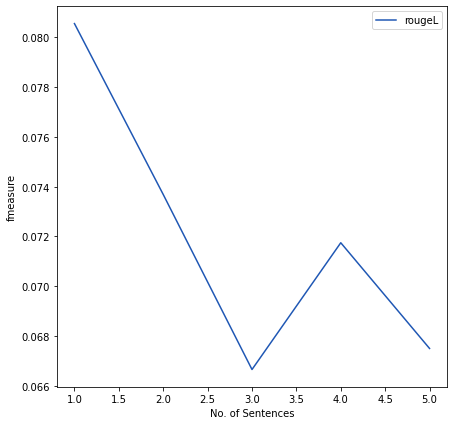

<Figure size 432x288 with 0 Axes>

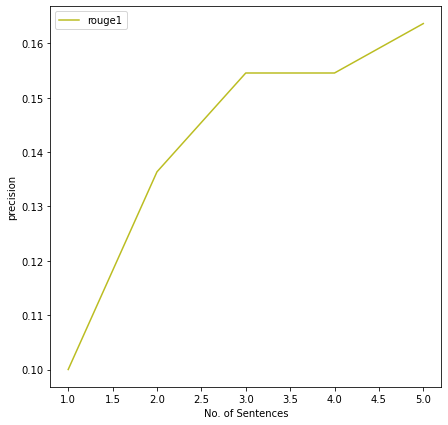

<Figure size 432x288 with 0 Axes>

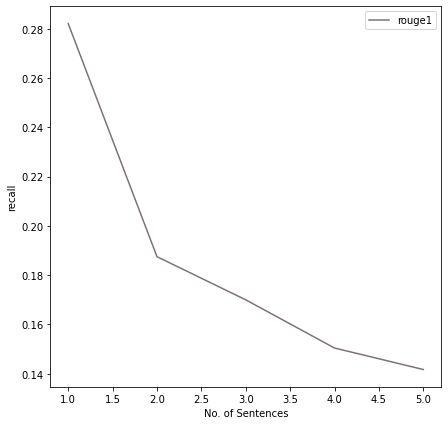

<Figure size 432x288 with 0 Axes>

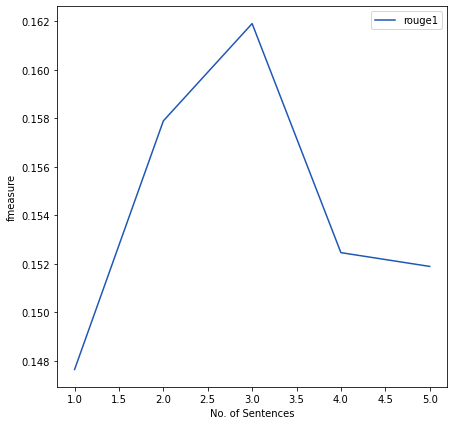

<Figure size 432x288 with 0 Axes>

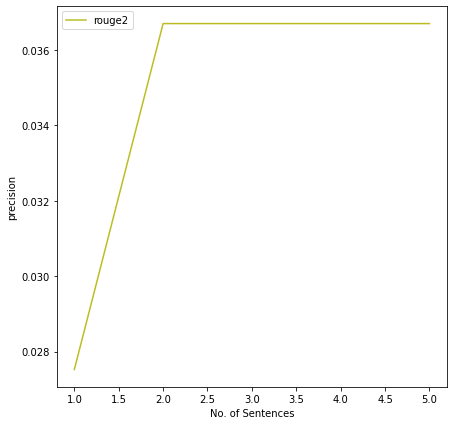

<Figure size 432x288 with 0 Axes>

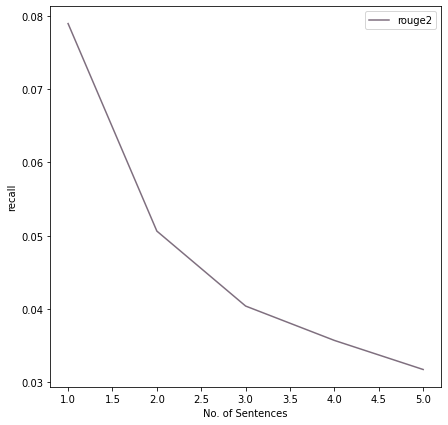

<Figure size 432x288 with 0 Axes>

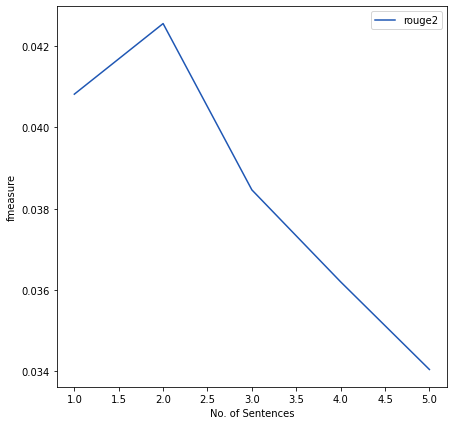

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.027777777777777776 0.058823529411764705 0.03773584905660377
2 0.06944444444444445 0.10204081632653061 0.08264462809917356
3 0.08333333333333333 0.09836065573770492 0.09022556390977443
4 0.08333333333333333 0.08571428571428572 0.08450704225352113
5 0.08333333333333333 0.07792207792207792 0.08053691275167785
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.027777777777777776 0.058823529411764705 0.03773584905660377
2 0.06944444444444445 0.10204081632653061 0.08264462809917356
3 0.08333333333333333 0.09836065573770492 0.09022556390977443
4 0.08333333333333333 0.08571428571428572 0.08450704225352113
5 0.08333333333333333 0.07792207792207792 0.08053691275167785
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.014084507042253521 0.030303030303030304 0.019

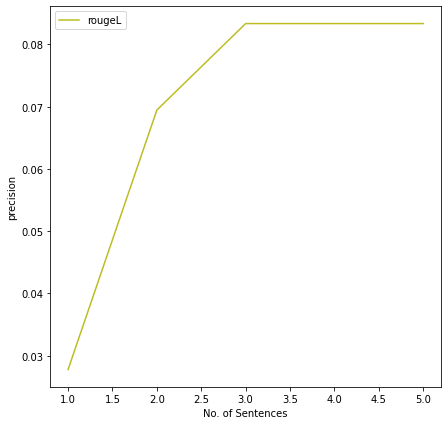

<Figure size 432x288 with 0 Axes>

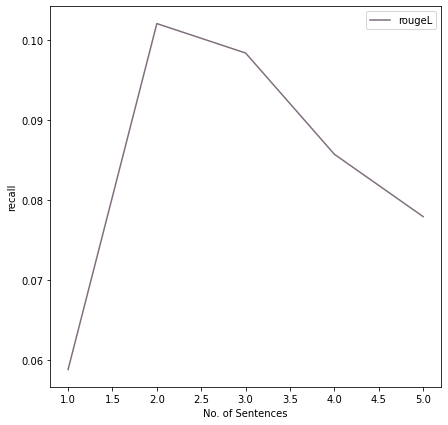

<Figure size 432x288 with 0 Axes>

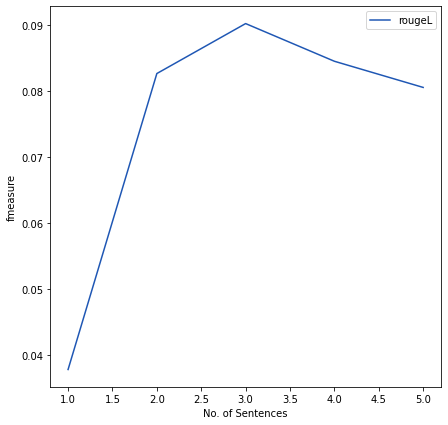

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

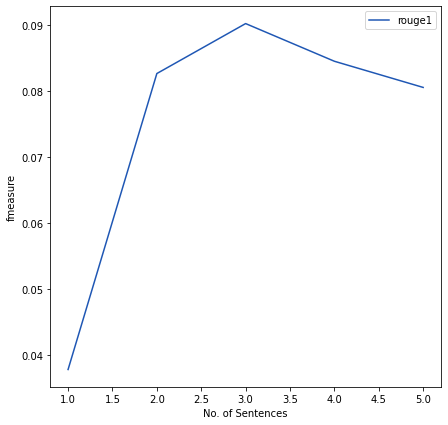

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

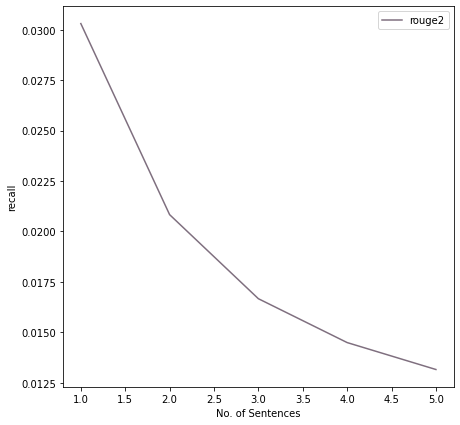

<Figure size 432x288 with 0 Axes>

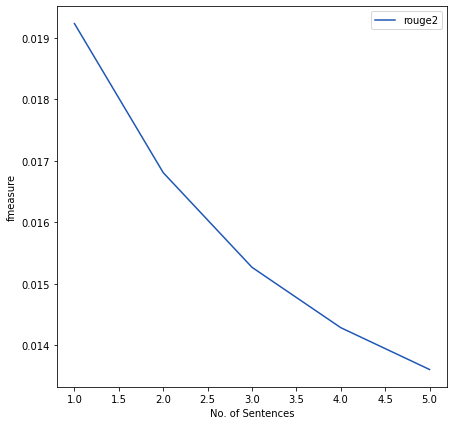

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.036585365853658534 0.23076923076923078 0.06315789473684211
2 0.036585365853658534 0.11538461538461539 0.05555555555555555
3 0.06097560975609756 0.09259259259259259 0.07352941176470587
4 0.07317073170731707 0.09230769230769231 0.08163265306122448
5 0.0975609756097561 0.0963855421686747 0.09696969696969697
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.04878048780487805 0.3076923076923077 0.08421052631578949
2 0.08536585365853659 0.2692307692307692 0.12962962962962962
3 0.14634146341463414 0.2222222222222222 0.1764705882352941
4 0.17073170731707318 0.2153846153846154 0.19047619047619047
5 0.2073170731707317 0.20481927710843373 0.20606060606060606
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.012345679012345678 0.08333333333333333 0.02150537634408

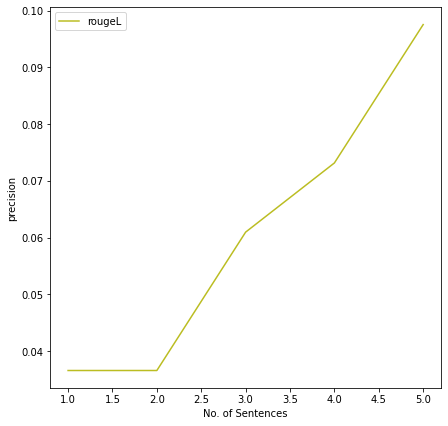

<Figure size 432x288 with 0 Axes>

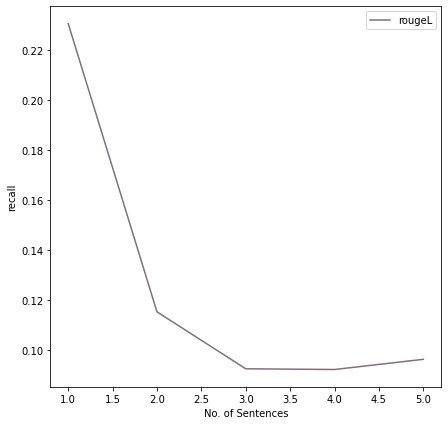

<Figure size 432x288 with 0 Axes>

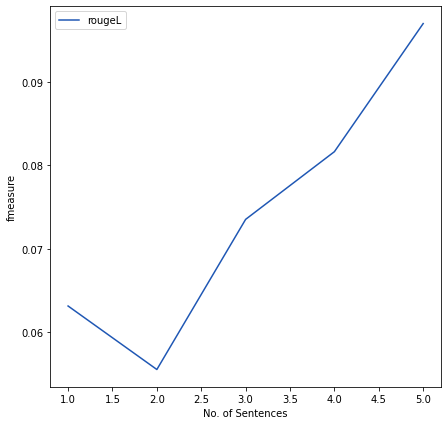

<Figure size 432x288 with 0 Axes>

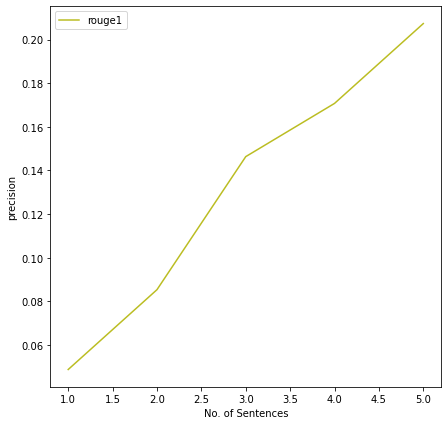

<Figure size 432x288 with 0 Axes>

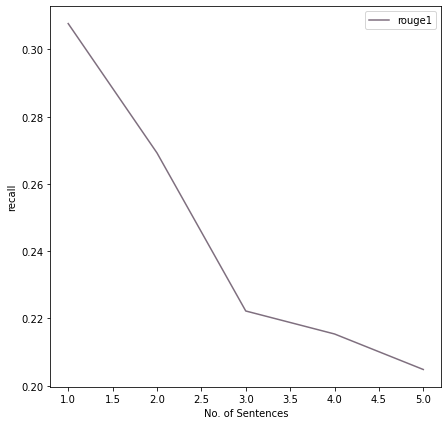

<Figure size 432x288 with 0 Axes>

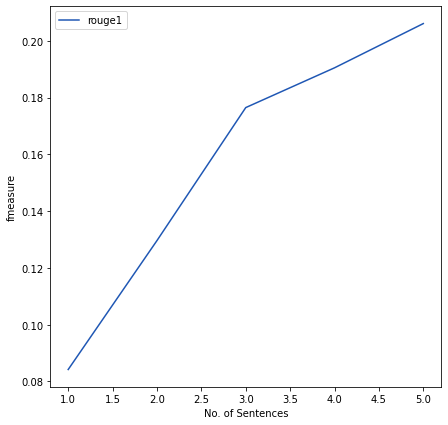

<Figure size 432x288 with 0 Axes>

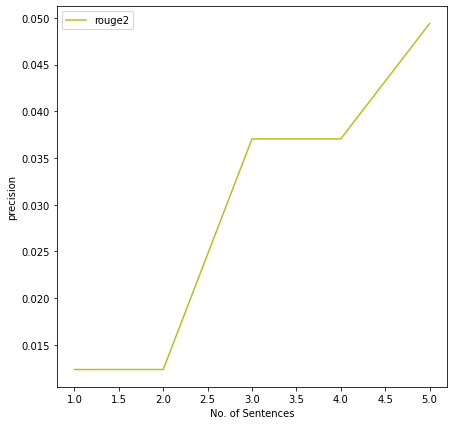

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

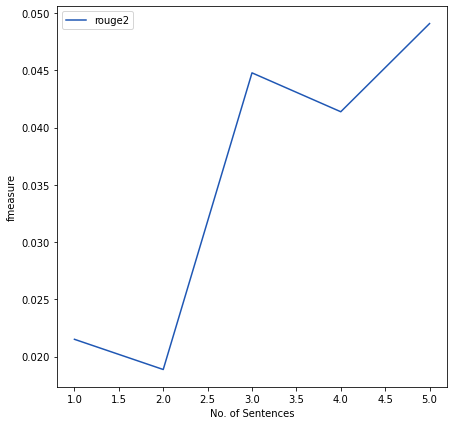

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.08196721311475409 0.21739130434782608 0.11904761904761903
2 0.08196721311475409 0.1388888888888889 0.10309278350515463
3 0.08196721311475409 0.09803921568627451 0.08928571428571427
4 0.11475409836065574 0.10606060606060606 0.11023622047244094
5 0.16393442622950818 0.12195121951219512 0.13986013986013987
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.11475409836065574 0.30434782608695654 0.16666666666666669
2 0.11475409836065574 0.19444444444444445 0.14432989690721648
3 0.13114754098360656 0.1568627450980392 0.14285714285714285
4 0.22950819672131148 0.21212121212121213 0.2204724409448819
5 0.26229508196721313 0.1951219512195122 0.2237762237762238
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.016666666666666666 0.045454545454545456 0.024390243902

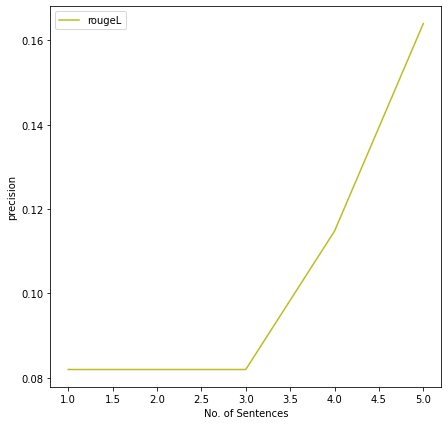

<Figure size 432x288 with 0 Axes>

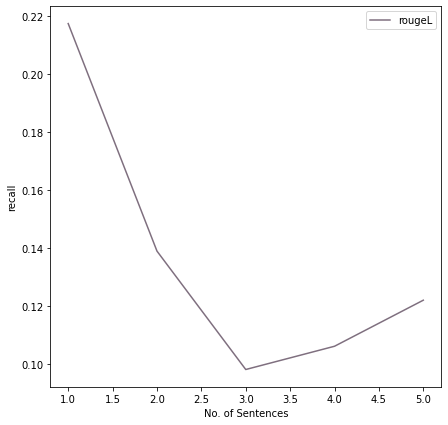

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

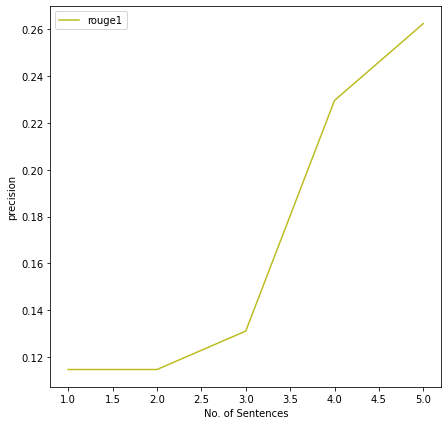

<Figure size 432x288 with 0 Axes>

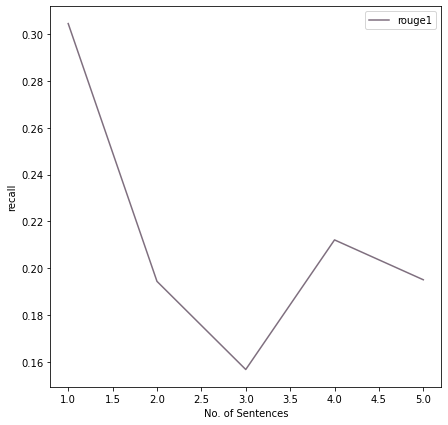

<Figure size 432x288 with 0 Axes>

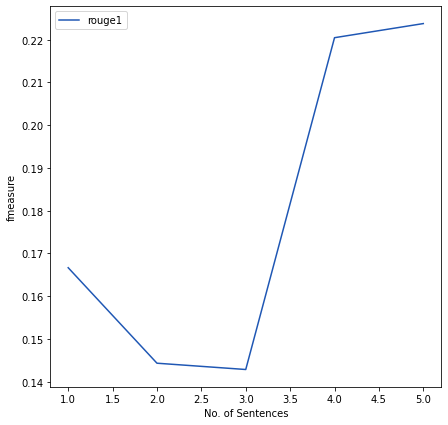

<Figure size 432x288 with 0 Axes>

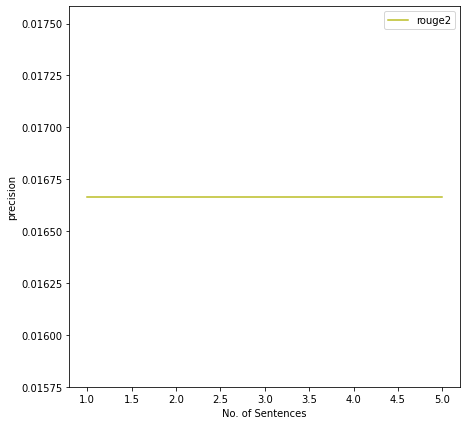

<Figure size 432x288 with 0 Axes>

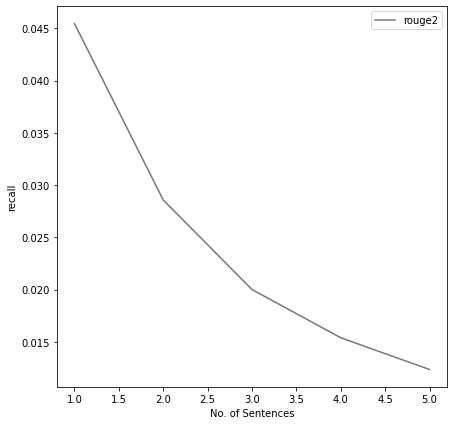

<Figure size 432x288 with 0 Axes>

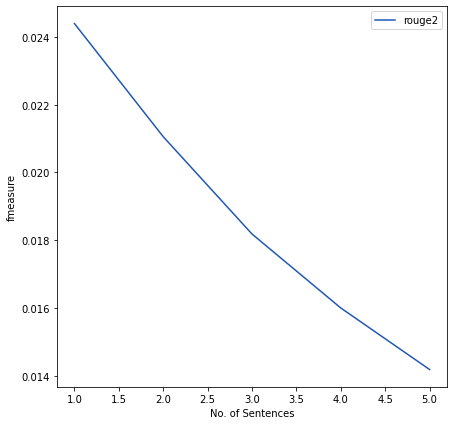

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.014925373134328358 0.13333333333333333 0.026845637583892617
2 0.022388059701492536 0.15 0.03896103896103895
3 0.03731343283582089 0.14705882352941177 0.05952380952380952
4 0.04477611940298507 0.16216216216216217 0.07017543859649124
5 0.04477611940298507 0.12244897959183673 0.06557377049180328
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.014925373134328358 0.13333333333333333 0.026845637583892617
2 0.029850746268656716 0.2 0.051948051948051945
3 0.05970149253731343 0.23529411764705882 0.09523809523809523
4 0.06716417910447761 0.24324324324324326 0.10526315789473684
5 0.07462686567164178 0.20408163265306123 0.1092896174863388
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0 0.0 0.0
<Figure 

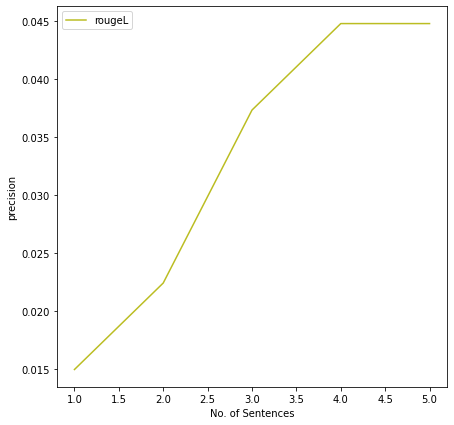

<Figure size 432x288 with 0 Axes>

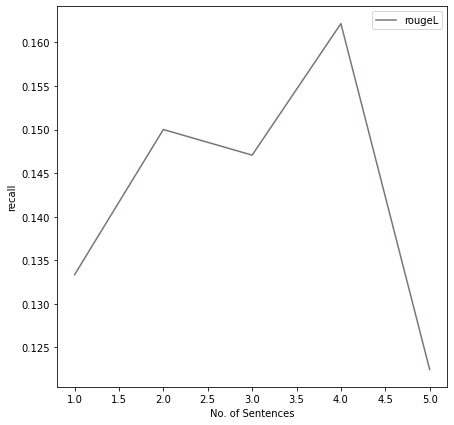

<Figure size 432x288 with 0 Axes>

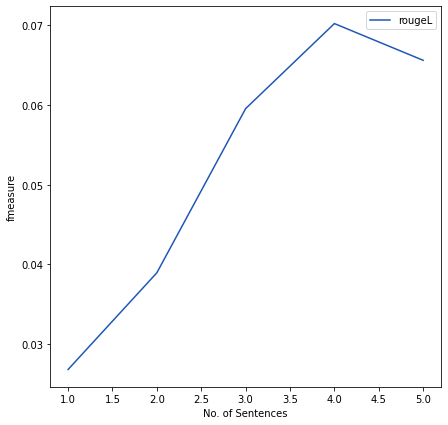

<Figure size 432x288 with 0 Axes>

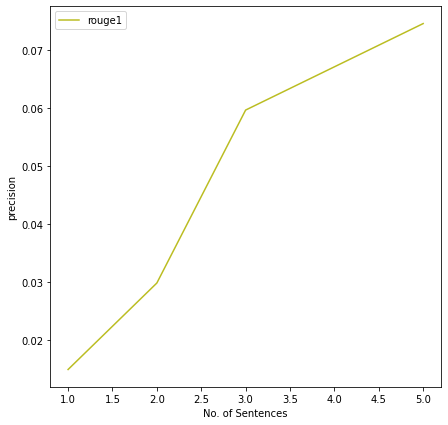

<Figure size 432x288 with 0 Axes>

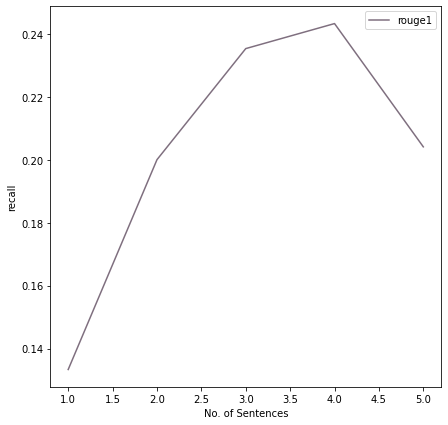

<Figure size 432x288 with 0 Axes>

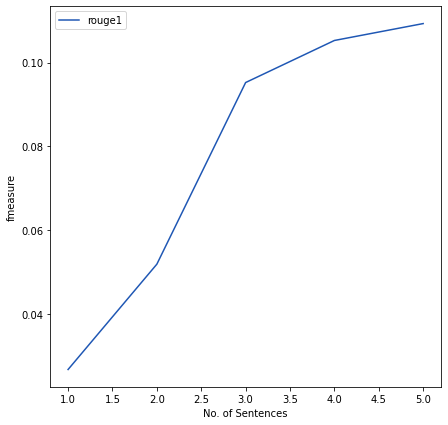

<Figure size 432x288 with 0 Axes>

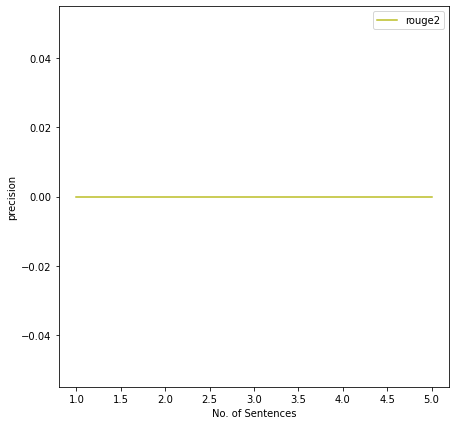

<Figure size 432x288 with 0 Axes>

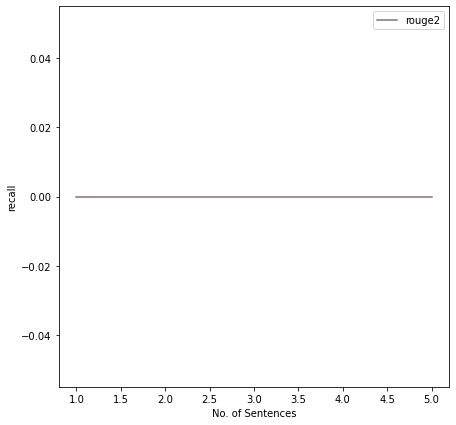

<Figure size 432x288 with 0 Axes>

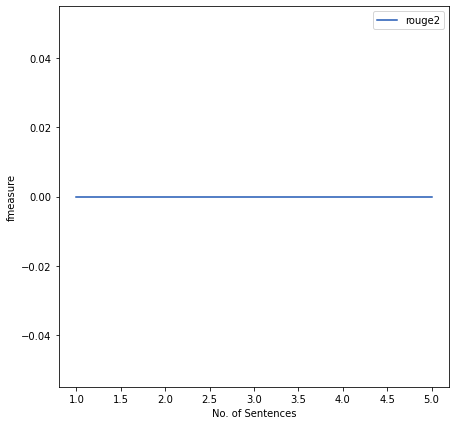

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.011363636363636364 0.0625 0.019230769230769232
2 0.03409090909090909 0.06976744186046512 0.045801526717557245
3 0.045454545454545456 0.07142857142857142 0.05555555555555555
4 0.056818181818181816 0.0641025641025641 0.06024096385542168
5 0.06818181818181818 0.05825242718446602 0.06282722513089005
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.011363636363636364 0.0625 0.019230769230769232
2 0.045454545454545456 0.09302325581395349 0.061068702290076333
3 0.06818181818181818 0.10714285714285714 0.08333333333333331
4 0.09090909090909091 0.10256410256410256 0.0963855421686747
5 0.13636363636363635 0.11650485436893204 0.1256544502617801
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0344827586206

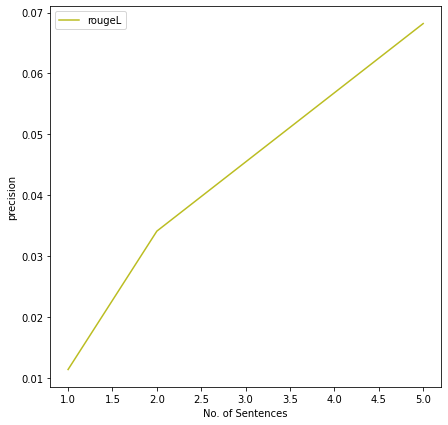

<Figure size 432x288 with 0 Axes>

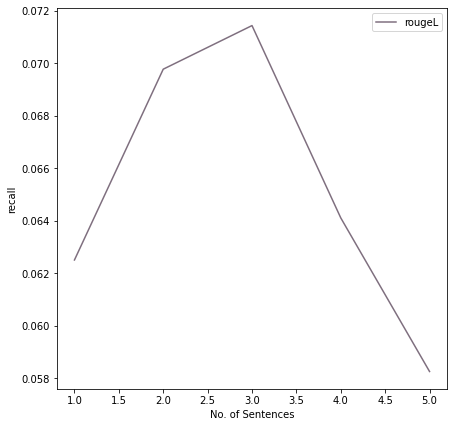

<Figure size 432x288 with 0 Axes>

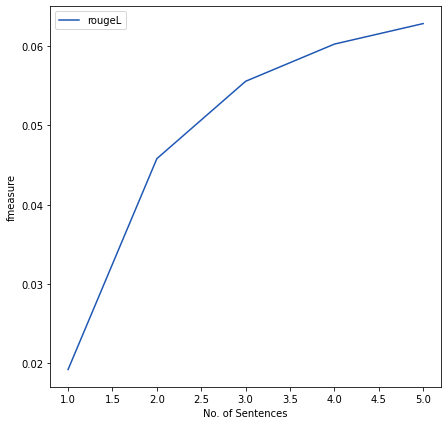

<Figure size 432x288 with 0 Axes>

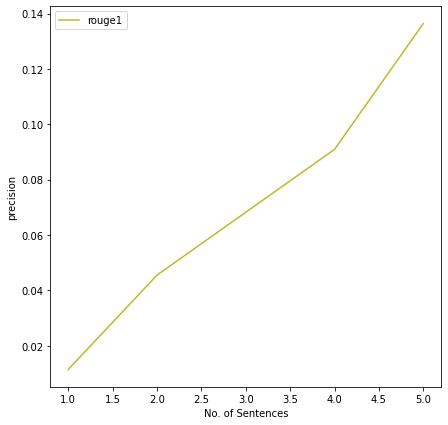

<Figure size 432x288 with 0 Axes>

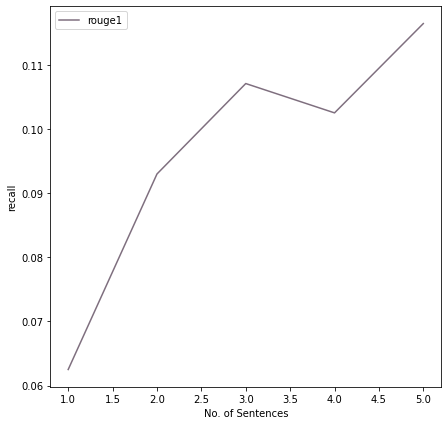

<Figure size 432x288 with 0 Axes>

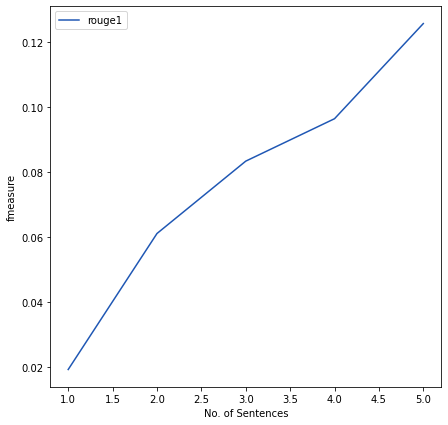

<Figure size 432x288 with 0 Axes>

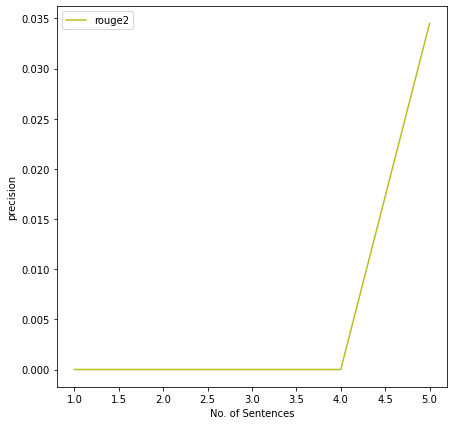

<Figure size 432x288 with 0 Axes>

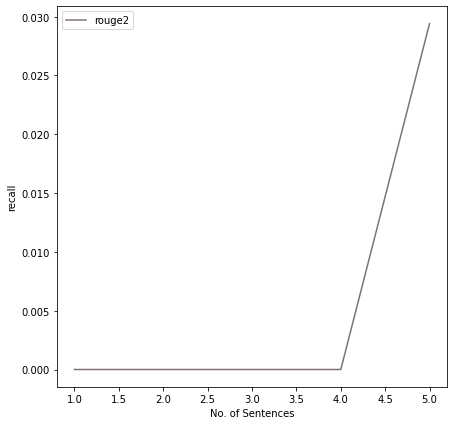

<Figure size 432x288 with 0 Axes>

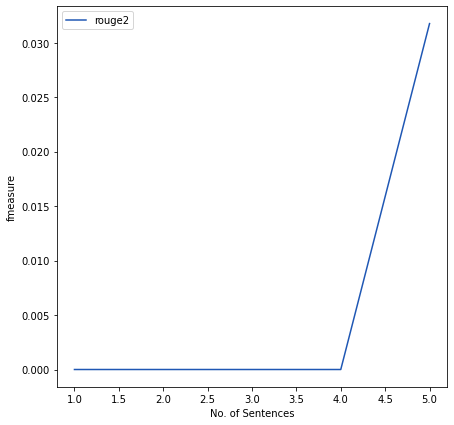

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.056338028169014086 0.13793103448275862 0.07999999999999999
2 0.07042253521126761 0.1282051282051282 0.0909090909090909
3 0.08450704225352113 0.11538461538461539 0.09756097560975609
4 0.09859154929577464 0.1076923076923077 0.10294117647058823
5 0.09859154929577464 0.08860759493670886 0.09333333333333332
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.11267605633802817 0.27586206896551724 0.15999999999999998
2 0.1267605633802817 0.23076923076923078 0.16363636363636364
3 0.15492957746478872 0.21153846153846154 0.17886178861788618
4 0.15492957746478872 0.16923076923076924 0.16176470588235295
5 0.15492957746478872 0.13924050632911392 0.14666666666666667
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.02857142857142857 0.07142857142857142 0.040816326530

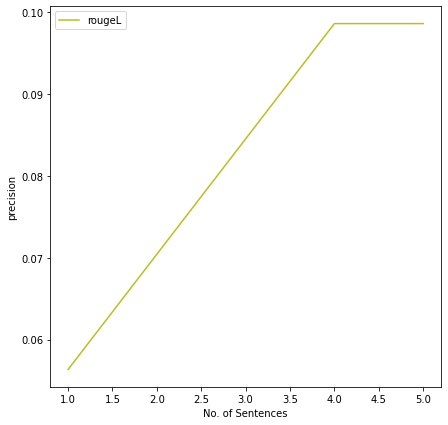

<Figure size 432x288 with 0 Axes>

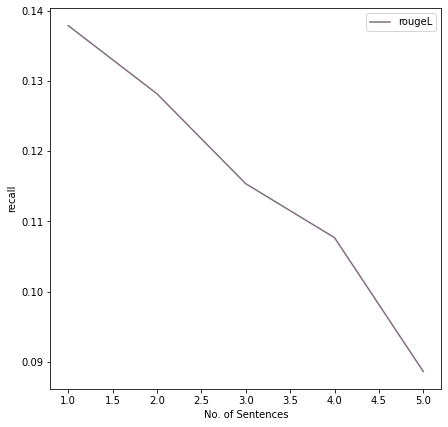

<Figure size 432x288 with 0 Axes>

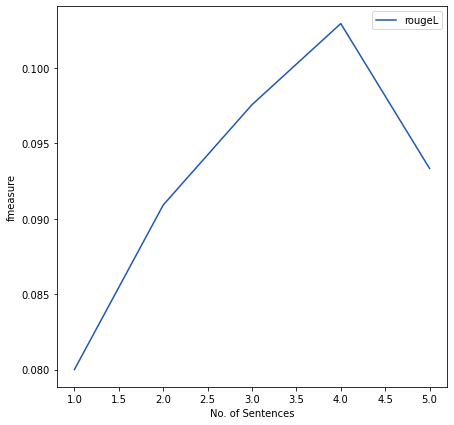

<Figure size 432x288 with 0 Axes>

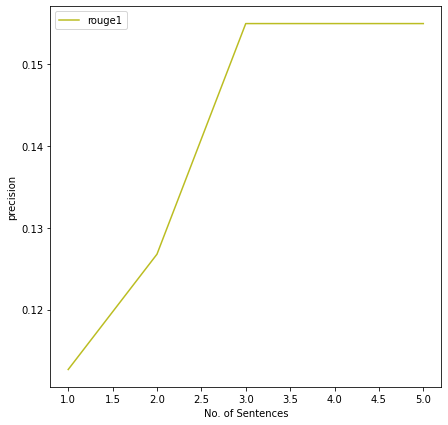

<Figure size 432x288 with 0 Axes>

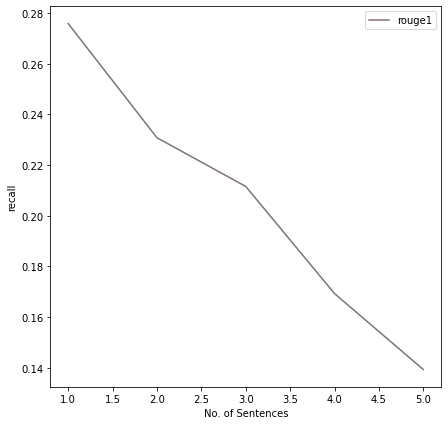

<Figure size 432x288 with 0 Axes>

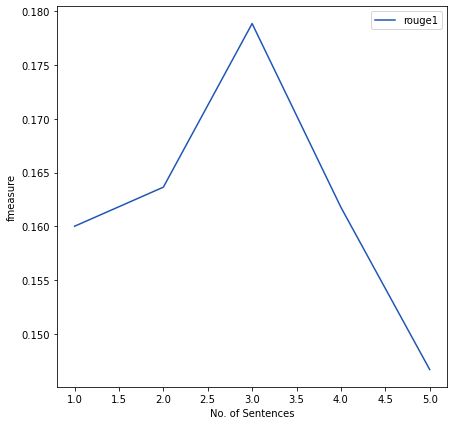

<Figure size 432x288 with 0 Axes>

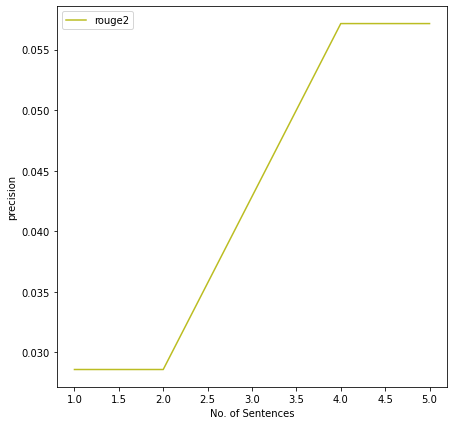

<Figure size 432x288 with 0 Axes>

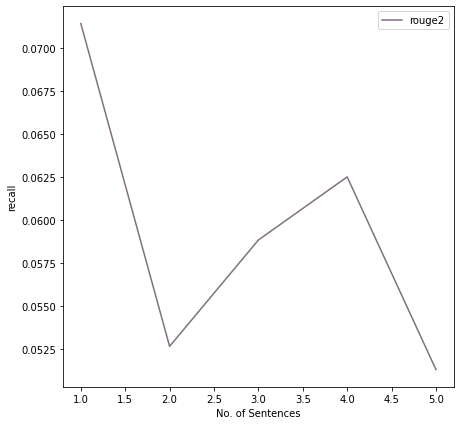

<Figure size 432x288 with 0 Axes>

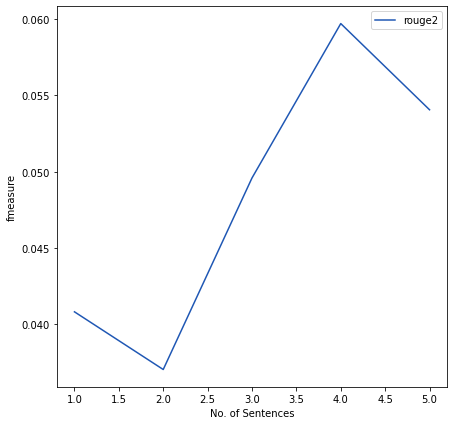

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.03278688524590164 0.1111111111111111 0.05063291139240506
2 0.08196721311475409 0.1 0.09009009009009009
3 0.09836065573770492 0.08333333333333333 0.09022556390977443
4 0.09836065573770492 0.06741573033707865 0.08
5 0.09836065573770492 0.057692307692307696 0.07272727272727272
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.03278688524590164 0.1111111111111111 0.05063291139240506
2 0.14754098360655737 0.18 0.16216216216216217
3 0.16393442622950818 0.1388888888888889 0.15037593984962405
4 0.16393442622950818 0.11235955056179775 0.13333333333333333
5 0.16393442622950818 0.09615384615384616 0.12121212121212122
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0 0.0 0.0
<Figure size 432x288 with 0 Axe

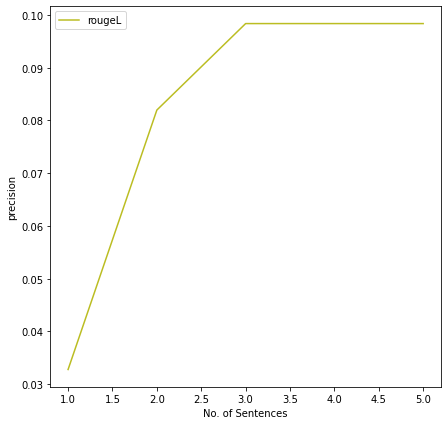

<Figure size 432x288 with 0 Axes>

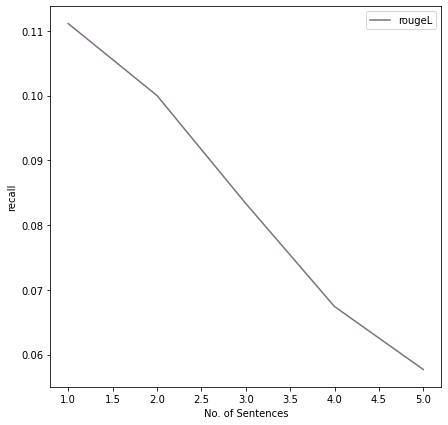

<Figure size 432x288 with 0 Axes>

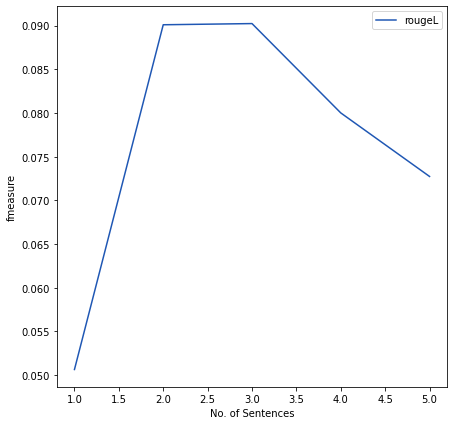

<Figure size 432x288 with 0 Axes>

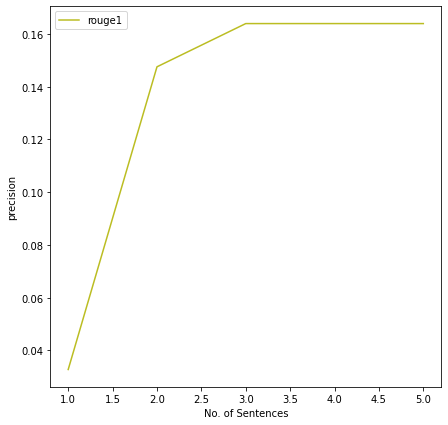

<Figure size 432x288 with 0 Axes>

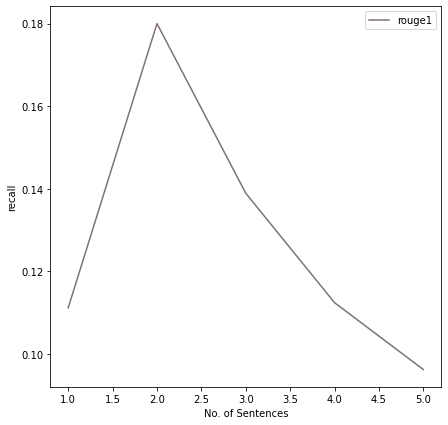

<Figure size 432x288 with 0 Axes>

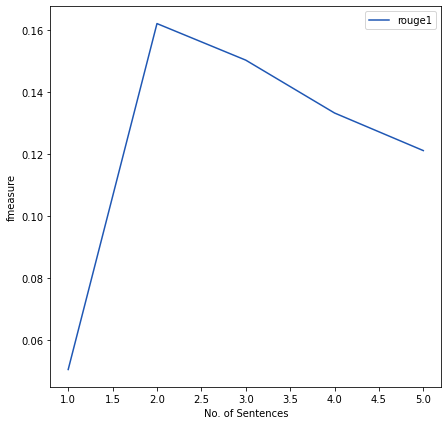

<Figure size 432x288 with 0 Axes>

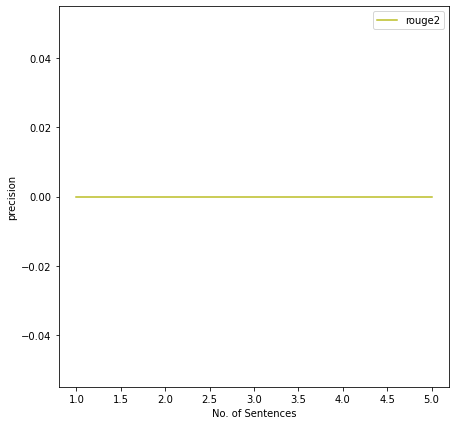

<Figure size 432x288 with 0 Axes>

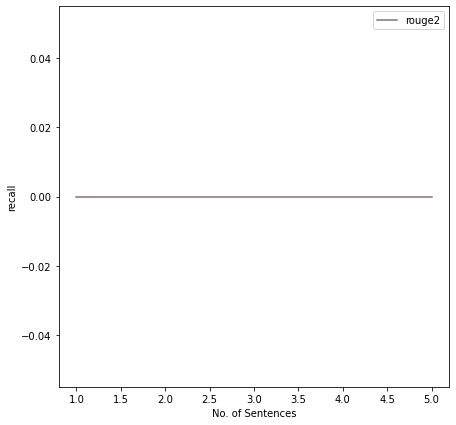

<Figure size 432x288 with 0 Axes>

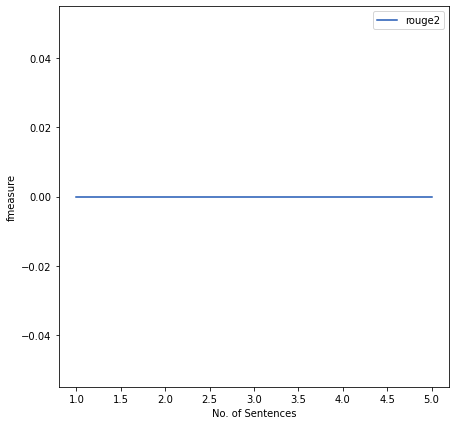

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.078125 0.25 0.11904761904761904
2 0.078125 0.14705882352941177 0.10204081632653061
3 0.078125 0.1 0.08771929824561403
4 0.078125 0.06666666666666667 0.07194244604316546
5 0.078125 0.056818181818181816 0.06578947368421052
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.09375 0.3 0.14285714285714285
2 0.09375 0.17647058823529413 0.12244897959183672
3 0.109375 0.14 0.12280701754385966
4 0.125 0.10666666666666667 0.11510791366906474
5 0.125 0.09090909090909091 0.10526315789473685
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.0 0.0 0.0
3 0.0 0.0 0.0
4 0.0 0.0 0.0
5 0.0 0.0 0.0
<Figure size 432x288 with 0 Axes>

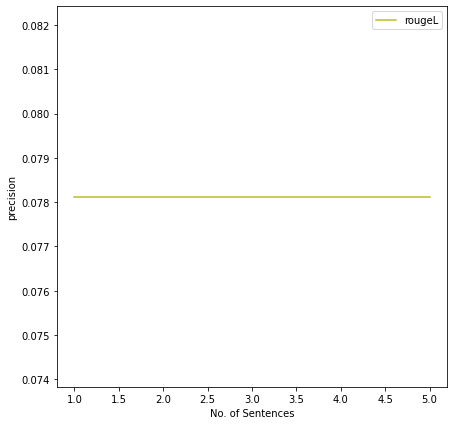

<Figure size 432x288 with 0 Axes>

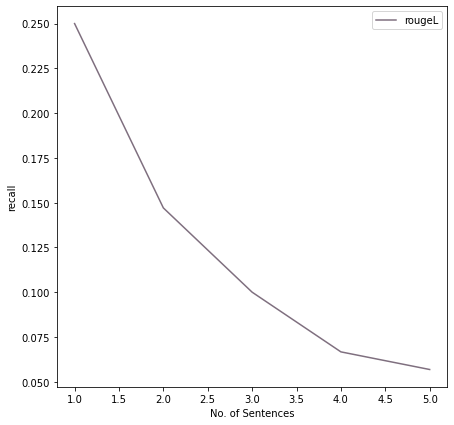

<Figure size 432x288 with 0 Axes>

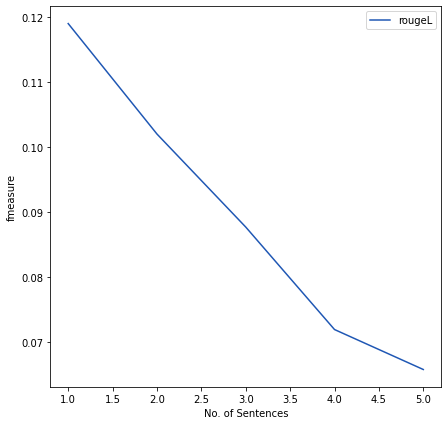

<Figure size 432x288 with 0 Axes>

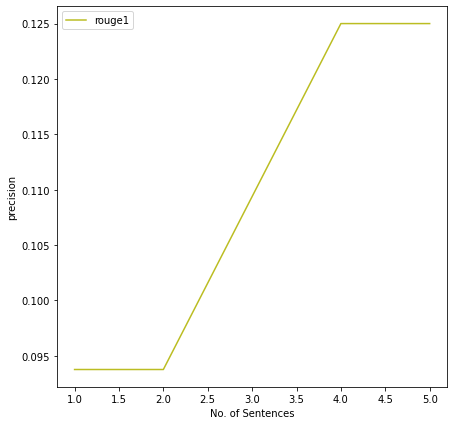

<Figure size 432x288 with 0 Axes>

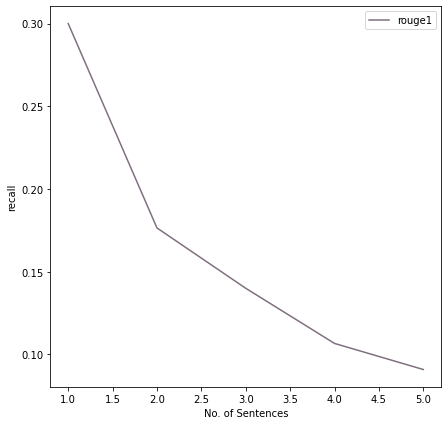

<Figure size 432x288 with 0 Axes>

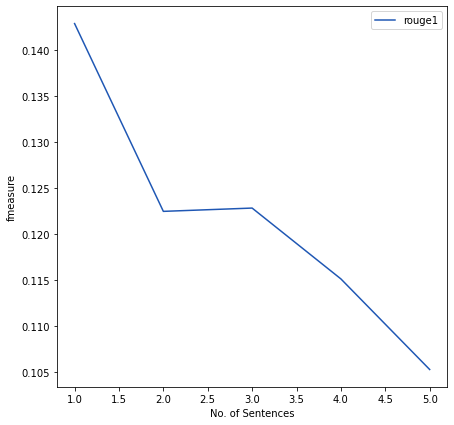

<Figure size 432x288 with 0 Axes>

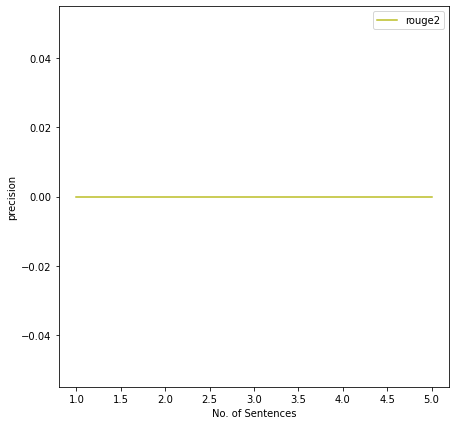

<Figure size 432x288 with 0 Axes>

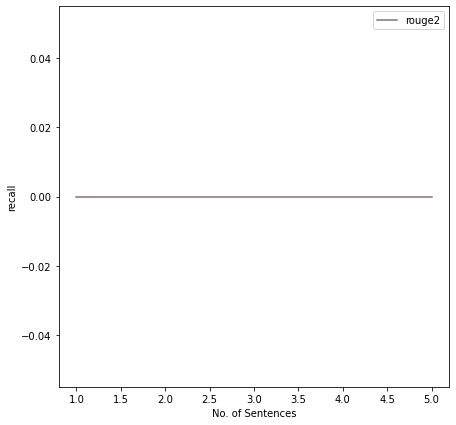

<Figure size 432x288 with 0 Axes>

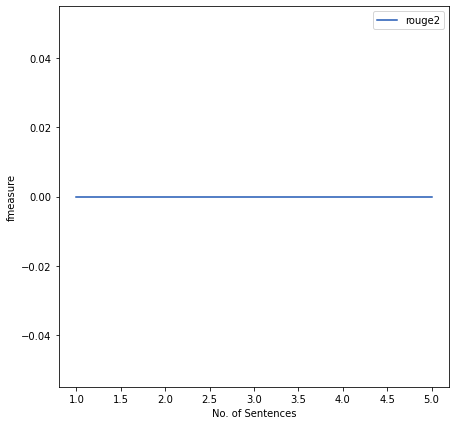

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.031914893617021274 0.0967741935483871 0.048
2 0.07446808510638298 0.12727272727272726 0.09395973154362416
3 0.07446808510638298 0.09090909090909091 0.08187134502923976
4 0.07446808510638298 0.07954545454545454 0.07692307692307693
5 0.09574468085106383 0.08256880733944955 0.08866995073891626
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.031914893617021274 0.0967741935483871 0.048
2 0.1276595744680851 0.21818181818181817 0.1610738255033557
3 0.11702127659574468 0.14285714285714285 0.1286549707602339
4 0.11702127659574468 0.125 0.12087912087912088
5 0.18085106382978725 0.1559633027522936 0.16748768472906403
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.03225806451612903 0.05555555555555555 0.04081632653061224
3 0.03225806451612903 0

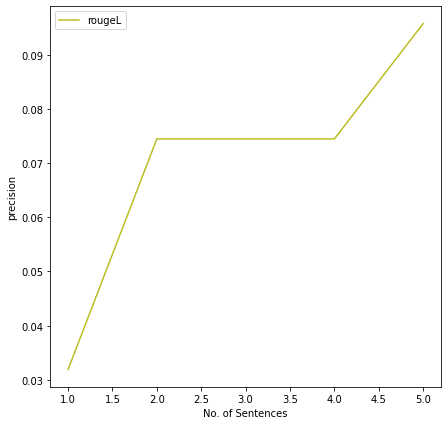

<Figure size 432x288 with 0 Axes>

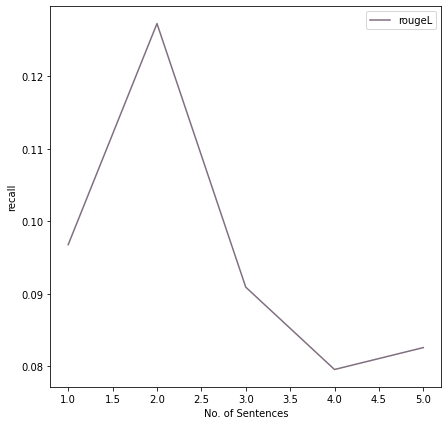

<Figure size 432x288 with 0 Axes>

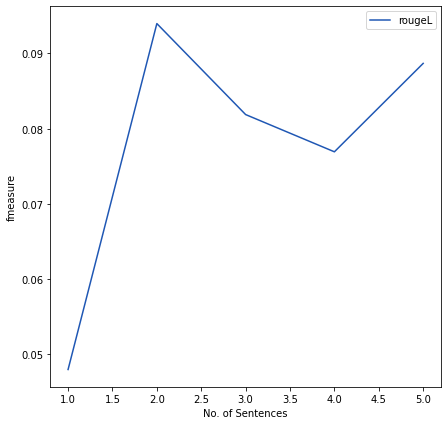

<Figure size 432x288 with 0 Axes>

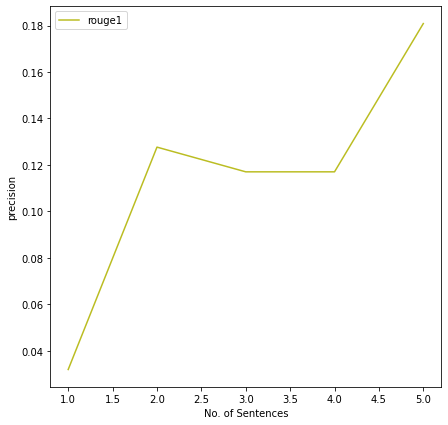

<Figure size 432x288 with 0 Axes>

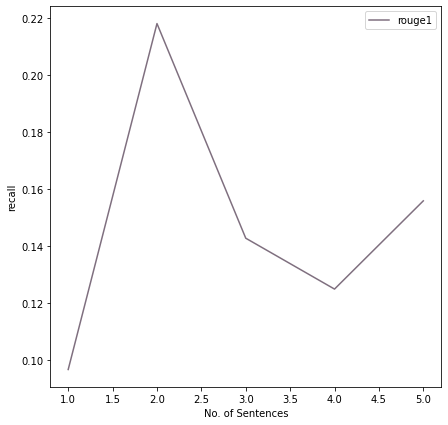

<Figure size 432x288 with 0 Axes>

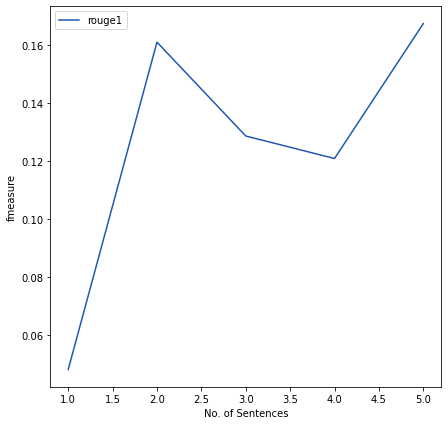

<Figure size 432x288 with 0 Axes>

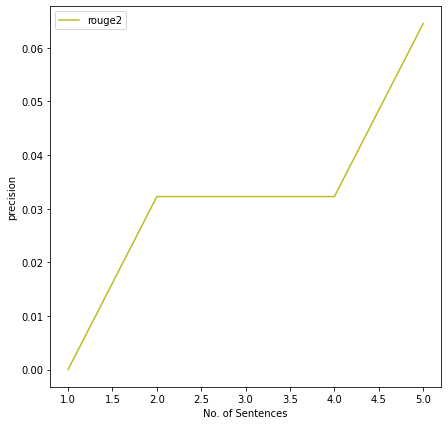

<Figure size 432x288 with 0 Axes>

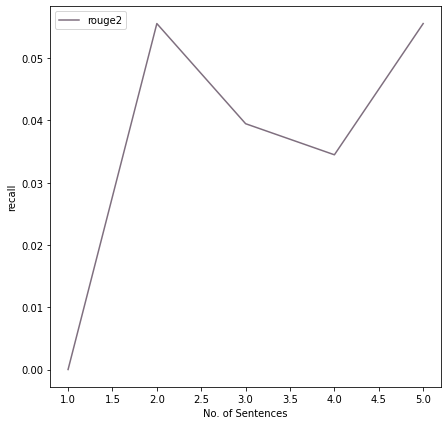

<Figure size 432x288 with 0 Axes>

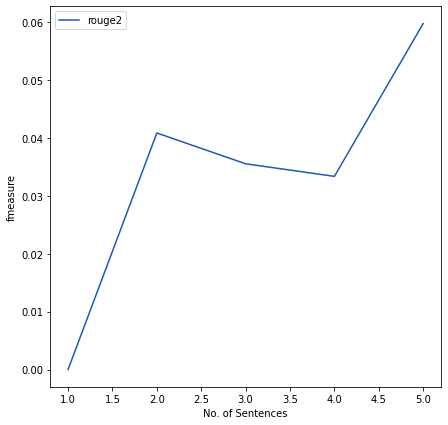

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.01098901098901099 0.08333333333333333 0.01941747572815534
2 0.08791208791208792 0.2222222222222222 0.12598425196850394
3 0.08791208791208792 0.17777777777777778 0.11764705882352944
4 0.08791208791208792 0.16 0.11347517730496455
5 0.08791208791208792 0.14035087719298245 0.1081081081081081
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.02197802197802198 0.16666666666666666 0.03883495145631068
2 0.13186813186813187 0.3333333333333333 0.18897637795275588
3 0.13186813186813187 0.26666666666666666 0.1764705882352941
4 0.13186813186813187 0.24 0.17021276595744683
5 0.14285714285714285 0.22807017543859648 0.17567567567567569
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.0 0.0 0.0
2 0.044444444444444446 0.11428571428571428 0.064
3 0.044444444444444446 0

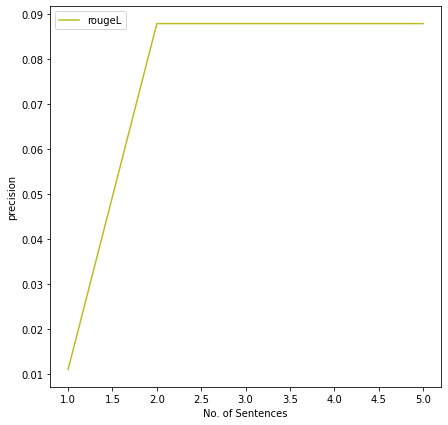

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

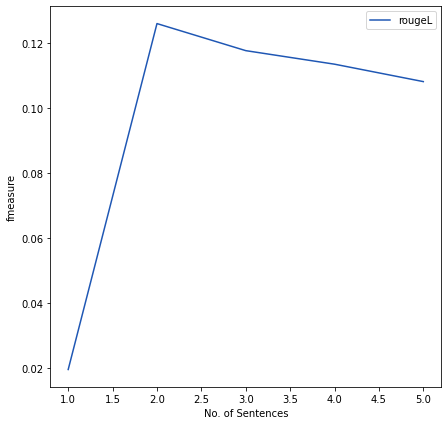

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

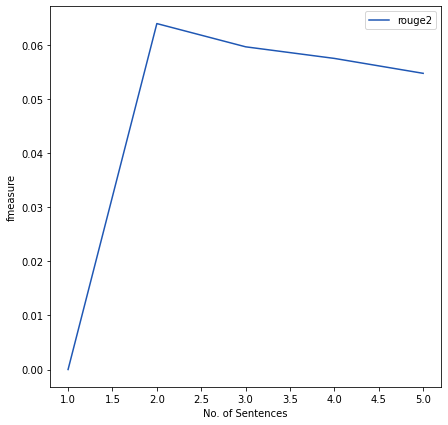

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.07291666666666667 0.21212121212121213 0.10852713178294575
2 0.17708333333333334 0.3953488372093023 0.2446043165467626
3 0.17708333333333334 0.30357142857142855 0.2236842105263158
4 0.17708333333333334 0.2463768115942029 0.20606060606060608
5 0.17708333333333334 0.20987654320987653 0.192090395480226
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.14583333333333334 0.42424242424242425 0.2170542635658915
2 0.22916666666666666 0.5116279069767442 0.3165467625899281
3 0.25 0.42857142857142855 0.3157894736842105
4 0.2604166666666667 0.36231884057971014 0.30303030303030304
5 0.2604166666666667 0.30864197530864196 0.2824858757062147
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.05263157894736842 0.15625 0.07874015748031496
2 0.09473684210526316 0.2142857

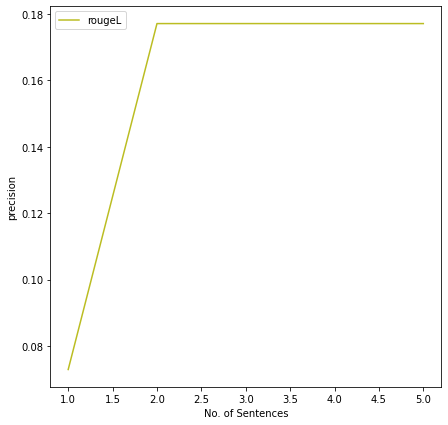

<Figure size 432x288 with 0 Axes>

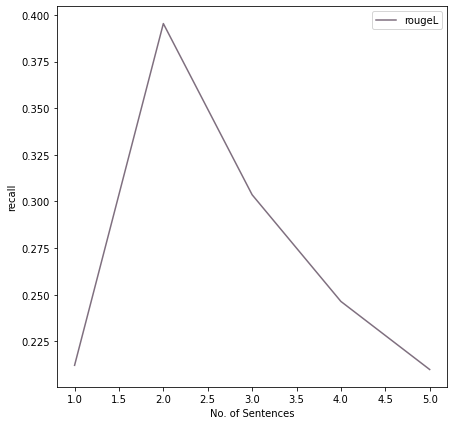

<Figure size 432x288 with 0 Axes>

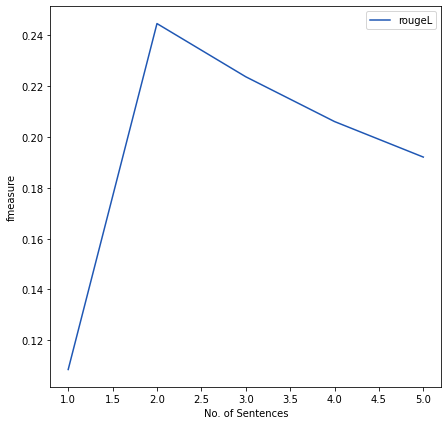

<Figure size 432x288 with 0 Axes>

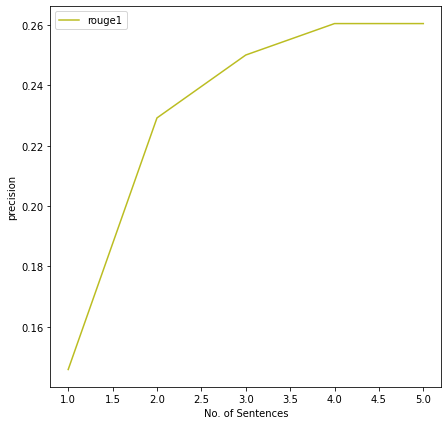

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

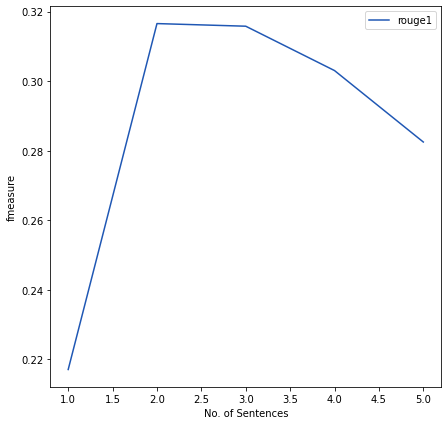

<Figure size 432x288 with 0 Axes>

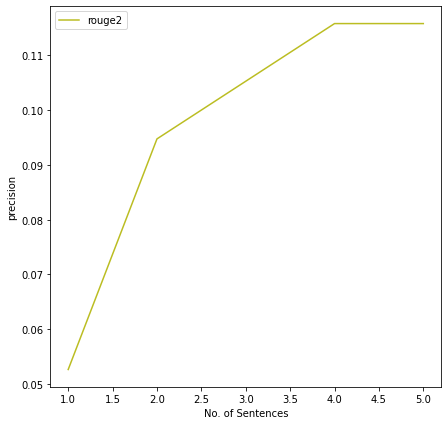

<Figure size 432x288 with 0 Axes>

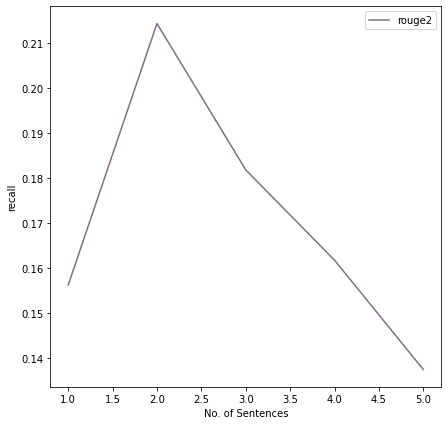

<Figure size 432x288 with 0 Axes>

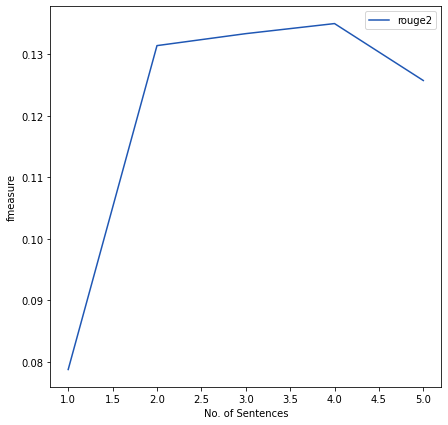

--------------------rougeL--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.04950495049504951 0.16666666666666666 0.07633587786259541
2 0.06930693069306931 0.16666666666666666 0.09790209790209792
3 0.07920792079207921 0.13793103448275862 0.10062893081761005
4 0.07920792079207921 0.11594202898550725 0.09411764705882353
5 0.0891089108910891 0.12 0.10227272727272727
--------------------rouge1--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.09900990099009901 0.3333333333333333 0.15267175572519082
2 0.1188118811881188 0.2857142857142857 0.16783216783216784
3 0.13861386138613863 0.2413793103448276 0.17610062893081763
4 0.1485148514851485 0.21739130434782608 0.1764705882352941
5 0.15841584158415842 0.21333333333333335 0.18181818181818182
--------------------rouge2--------------------------
Sentence_Number      precision     recall      fmeasure
1 0.03 0.10344827586206896 0.04651162790697674
2 0.03 0.07317073170731707 0

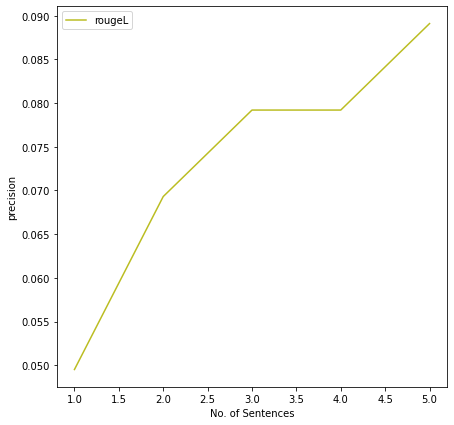

<Figure size 432x288 with 0 Axes>

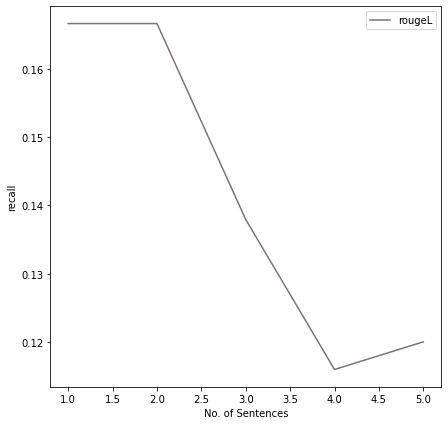

<Figure size 432x288 with 0 Axes>

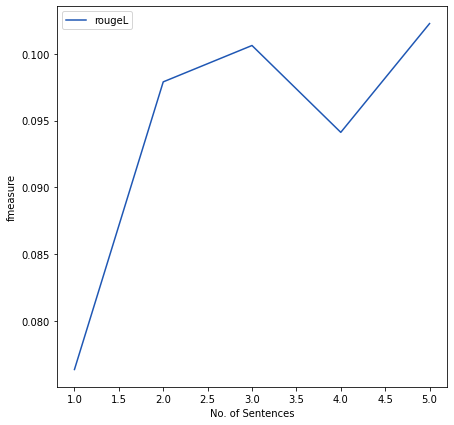

<Figure size 432x288 with 0 Axes>

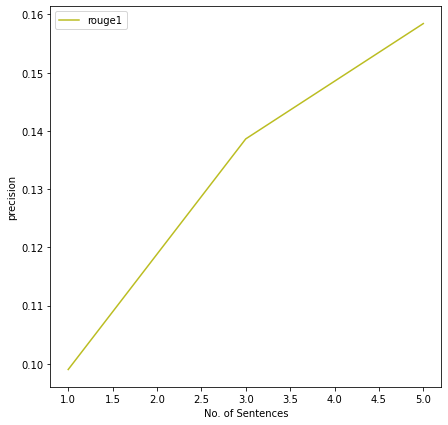

<Figure size 432x288 with 0 Axes>

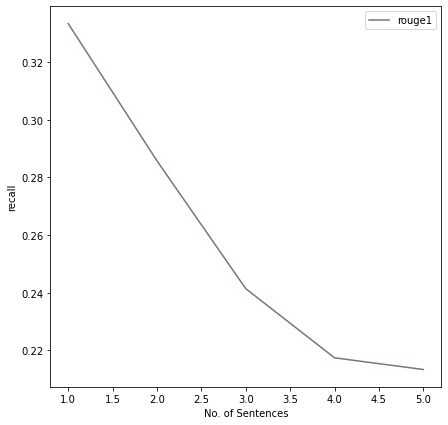

<Figure size 432x288 with 0 Axes>

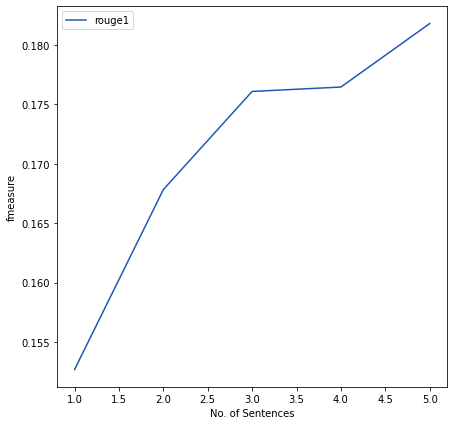

<Figure size 432x288 with 0 Axes>

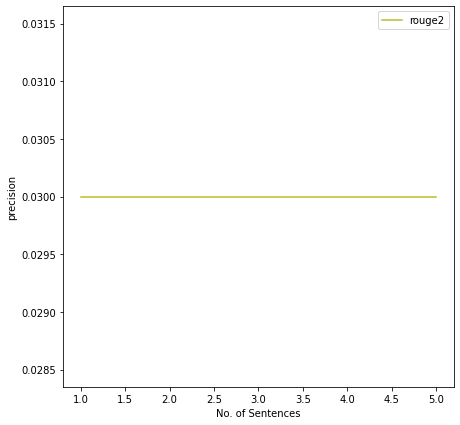

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

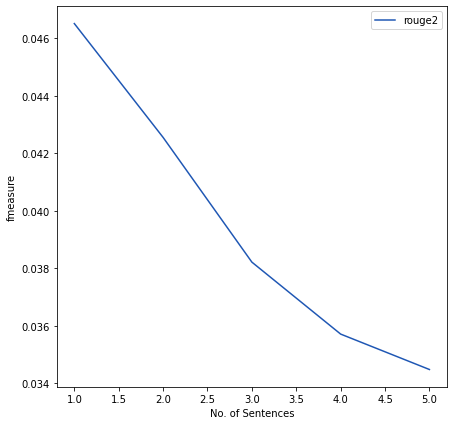

<Figure size 432x288 with 0 Axes>

In [0]:
in_aws_s=['s3://vinnubigdata/Project/story/']
art_list=['0a57c604f972b4b190cf02819ef1b50d0886d88a.story', '0ac7adff1e1da0757f8ae1825872b0ac51236928.story', '0ad6e0e18918f8ea0c33ac3f4b07f791bfc5929b.story', '0b8afba5b0e6d9ac633a58ef4b6cb830e3fcd85c.story', '0ba73570295a5ca2951079aed5e1dc5fe7e58b21.story', '0bc55c4e3c651628ad0e409a8b7c15139a917e3e.story', '0c0a6a6459a9fda3a5fdd3bfb15e26afb206d3f1.story', '0c15f4bb435ecef83ae88a19ba9e3a4bff98ce28.story', '0c3378f7968d8c3b2309485806a9cc6a0035837d.story', '0d70bf0e7219e1bae4a6fe178c16b6628349c54d.story', '0e0bdf77a264313fa9c706e2a02ce33b42e6494d.story', '0f0c1a6393cdc7b73a305d5c8486e0276a14d10a.story', '0f403e5cb77aca20188e3d437e4f2d8566afe4a1.story', '10547416183a0b7ade862789ca2445b00164efea.story', '1a04fa5c48398379b500e1336c81decb2e9f82e1.story', '1afd2df29d4e642f20130a231d27004216667fe1.story', '1b1e38e9bf01b9030121bbcce049c15fb0673cb9.story', '1b3bdc7fa131c4c82e8e996c936abe0da840e2ef.story', '4d37e8e54986543598ced33dd2ebb1907e14f163.story', '610c78a5a3d8ac17caa24646332e7cf938fae805.story', '697d9ab27a5b76589bc93f1be2ca76a1605b21ef.story', '9e107710387431c83cd2bc12f8fde0001617e3d1.story', 'b787f83c7d6458e1574b3a2589759a6d60428da4.story', 'd0ffe27ec1d04b350e41a69a60de2e98fa0c8e77.story', 'd9d7836b2bf65d6c3d2643fe9694a2234cb19281.story']
allabstracts=[]
count=0
for w1 in art_list:
    nmf=in_aws_s[0]+w1
    artcl=spark.sparkContext.textFile(nmf)
    art=artcl.collect()
    art.remove('')
    abst=art[0]+' '+art[1]+' '+art[3]
    abst=abst.replace('(CNN)','')
    abst=abst.replace('--','')
    abst=abst.strip()
    p=''
    p1=''
    for i in range(4,len(art)):
        p1=p1+' '+art[i]
    p1=p1.replace('@highlight','')
    p1=tokenize.sent_tokenize(p1)
    p=[]
    for i in p1:
        p.append(i.replace("--","").strip())
    word_embed_ = {}
    E_word()
    setw = set (stopwords.words ('english'))
    f_Sen=p
    p_sen = []
    temp1=[]
    s="" 
    h=0
    while h<(len(f_Sen)):
        temp=str(f_Sen[h])
        for z in temp.split(" "):
            if z.lower() not in setw:
                s+=z+" "
        temp1.append(s)
        s=""                  
        h+=1
    temp2=[]
    for i in temp1:
        temp2.append(i.strip())
    p_sen=[]
    p_sen.append((0,temp2))
    apl,arl,afl,ap1,ar1,af1,ap2,ar2,af2=[[[]] for _ in range(9)]
    rfnce=[]
    rfnce.append(abst)
    no_sntncs = [s for s in range(1,6,1)]
    l2=['rouge1', 'rouge2', 'rougeL']
    l3=['precision','recall','fmeasure']
    sr = rouge_scorer.RougeScorer(l2)
    for t in p_sen:
        abstract = ""
        mn = t[1]
        lstofs = []
        res1=0
        for z in mn:
            h=z.split()
            h1=len(h)
            h1+=(1/1000)
            h2=ny.zeros((10**2,))
            res1= sum([ word_embed_.get(z1, h2) for z1 in h])/h1
            lstofs.append(ny.array(res1))
        lstofs = ny.array(lstofs)
        smt = cal_Sim_MAT(lstofs,mn,10**2)
        for k1 in range(1,len(no_sntncs)+1,1):
            ordsen = sntnce_ranking(mn, smt)
            result_lst = get_abstract(ordsen, k1)
            eachlineabs = [mn[z] for z in result_lst]
            abstract = ''.join(eachlineabs)
            score = sr.score(abstract, rfnce[0])
            apl[0].append(score[l2[2]][0])
            arl[0].append(score[l2[2]][1])
            afl[0].append(score[l2[2]][2])
            ap1[0].append(score[l2[0]][0])
            ar1[0].append(score[l2[0]][1])
            af1[0].append(score[l2[0]][2])
            ap2[0].append(score[l2[1]][0])
            ar2[0].append(score[l2[1]][1])
            af2[0].append(score[l2[1]][2])
    allabstracts.append([w1,abstract])
    print("--------------------rougeL--------------------------")
    print("Sentence_Number","     "+l3[0],"    "+l3[1],"     "+l3[2])
    for i in range(0,len(apl[0])):
        print(i+1,apl[0][i],arl[0][i],afl[0][i])

    print("--------------------rouge1--------------------------")
    print("Sentence_Number","     "+l3[0],"    "+l3[1],"     "+l3[2])
    for i in range(0,len(ap1[0])):
        print(i+1,ap1[0][i],ar1[0][i],af1[0][i])
    print("--------------------rouge2--------------------------")
    print("Sentence_Number","     "+l3[0],"    "+l3[1],"     "+l3[2])
    for i in range(0,len(ap2[0])):
        print(i+1,ap2[0][i],ar2[0][i],af2[0][i])
        
    grhplt(apl, l3[0], no_sntncs, l2[2])
    grhplt (arl, l3[1], no_sntncs, l2[2])
    grhplt (afl, l3[2], no_sntncs, l2[2])
    grhplt (ap1, l3[0], no_sntncs, l2[0])
    grhplt (ar1, l3[1], no_sntncs, l2[0])
    grhplt (af1, l3[2], no_sntncs, l2[0])
    grhplt (ap2, l3[0], no_sntncs, l2[1])
    grhplt (ar2, l3[1], no_sntncs, l2[1])
    grhplt (af2, l3[2], no_sntncs, l2[1])
  



In [0]:
print(allabstracts)

[['0a57c604f972b4b190cf02819ef1b50d0886d88a.story', "Court documents identify friend Alexander Bradley, would go accuse Hernandez shooting eye incident would take place seven months later.Jurors also hear anything happened Boston July 16, 2012  night two men murdered outside club Hernandez been.Hernandez one 20 people interviewed police, one make statement invoking right counsel.Prosecutors: Bump, spilled drink led double homicide  Hernandez's friend tried calm down, pair walked outside eventually entered second club across street, prosecutor said.Prosecutors say three men tried joint venture, legal term means necessary prove pulled trigger long evidence defendant actively participated Lloyd's murder."], ['0ac7adff1e1da0757f8ae1825872b0ac51236928.story', "people displaced live Moscow; people lost homes live greater Boston    WFP cut food ration sizes 30% lack donationsreduction size food rations World Food Programme says forced make due lack donations.number Syrians need immediate life